In [2]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os
import seaborn as sns
from scipy.stats import binned_statistic
import matplotlib
import matplotlib.backends.backend_pdf

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [3]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'

#### with/without N(z) prior

In [38]:
# with nzprior
cat_output_13_withprior = Table.read(output_dir+'cat_out_il_nzprior_13bands.fits')
cat_output_15_withprior = Table.read(output_dir+'cat_out_il_nzprior.fits')

# without nzprior
cat_output_13 = Table.read(output_dir+'cat_out_il_13bands.fits')
cat_output_15 = Table.read(output_dir+'cat_out_il.fits')

cat_output_15 = cat_output_15['Z_BEST']
cat_output_13 = cat_output_13 ['Z_BEST']
cat_output_15_withprior = cat_output_15_withprior['Z_BEST']

cat_output = hstack([cat_output_15, cat_output_13],table_names=['15','13'])
cat_output_withprior = hstack([cat_output_15_withprior, cat_output_13_withprior],table_names=['prior_15','prior_13'])
cat_output = hstack([cat_output,cat_output_withprior])

In [39]:
# match the output catalog with COSMOS2020 and save to disk
cat_output_name = output_dir+'cat_out_13and15_prior_check.fits'
cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
combined_cat_name = output_dir+'cat_out_13and15il_cosmosadded.fits'
join = '1and2'

# matching cat_output and cat_c20
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_output_name + \
                ' in2='+cat_c20_name+' find=best join='+join+' matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_13and15_prior_check.fits in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_13and15il_cosmosadded.fits


0

In [40]:
cat_matched = Table.read(combined_cat_name)
cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
         ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

cond_ch1 = ( (cat_matched['MAG_AUTO_CH1'] > 0.) & (cat_matched['MAG_AUTO_CH1'] < 50.) & (cat_matched['MAGERR_AUTO_CH1'] > 0.) & (cat_matched['MAGERR_AUTO_CH1'] < 0.5) )
cond_ch2 = ( (cat_matched['MAG_AUTO_CH2'] > 0.) & (cat_matched['MAG_AUTO_CH2'] < 50.) & (cat_matched['MAGERR_AUTO_CH2'] > 0.) & (cat_matched['MAGERR_AUTO_CH2'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 

cond_massive_c20 = (cat_matched['lp_mass_med']>11.3)
cond_massive_v = (cat_matched['MASS_MED']>11.3)
print(len(cat_matched))

2484


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


13
0.15384615384615385
0.15384615384615385


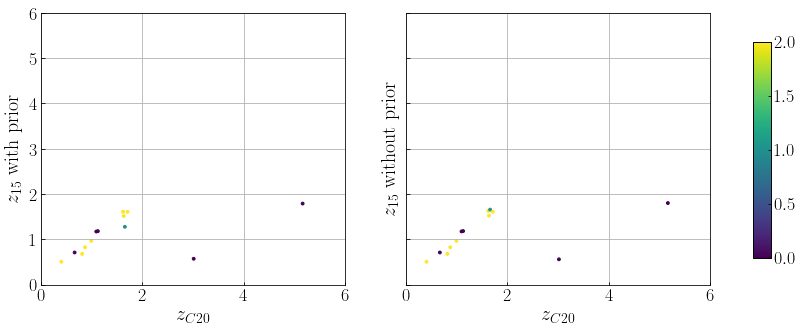

In [41]:
cat_select = cat_matched[cond_massive_c20]
print(len(cat_select))

fig, axs = plt.subplots(1, 2, figsize = (12, 5),sharex=True, sharey=True)
im = axs[0].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_prior_15'],s=8,c=flag_irac[cond_massive_c20],marker='o')
axs[1].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_15'],s=8,c=flag_irac[cond_massive_c20],marker='o')

outlier_factor = 0.15
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_prior_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[0].set_ylabel('$z_{15}$ with prior',fontsize=20)
axs[1].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[1].set_ylabel('$z_{15}$ without prior',fontsize=20)

axs[0].grid()
axs[1].grid()
cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)

1192
0.2625838926174497
0.2634228187919463


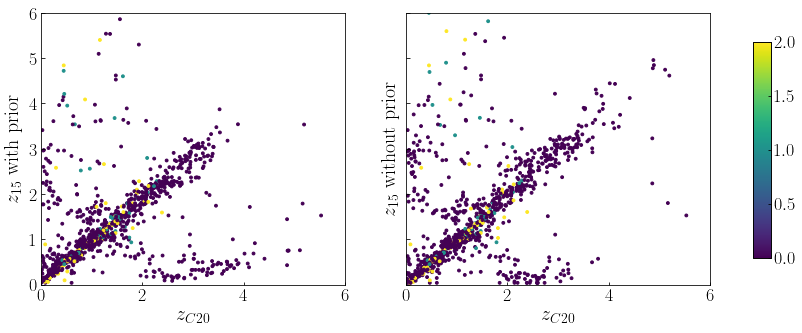

In [42]:
cat_select = cat_matched[(flag_nir==0)]
print(len(cat_select))

fig, axs = plt.subplots(1, 2, figsize = (12, 5),sharex=True, sharey=True)
im = axs[0].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_prior_15'],s=8,c=flag_irac[(flag_nir==0)],marker='o')
axs[1].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_15'],s=8,c=flag_irac[(flag_nir==0)],marker='o')

outlier_factor = 0.15
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_prior_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[0].set_ylabel('$z_{15}$ with prior',fontsize=20)
axs[1].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[1].set_ylabel('$z_{15}$ without prior',fontsize=20)

cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)

#### check coverage of the sample

In [89]:
cosmos_v9 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')
inside_j=cosmos_v9['inside_j']

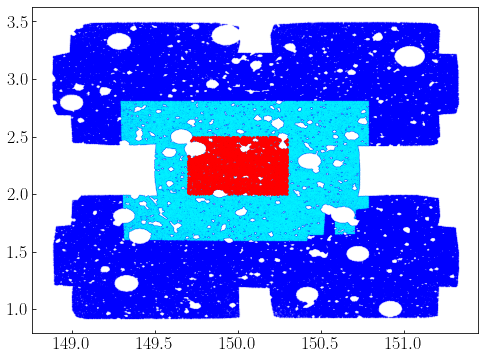

In [128]:
fig, axs = plt.subplots(1, 1, figsize = (8, 6),sharex=True, sharey=True)
cat_output_full_name = output_dir+'cat_out_15band_il.fits'
cat_output = Table.read(cat_output_full_name)

plt.scatter(cosmos_v9['RA'],cosmos_v9 ['DEC'],s=0.1,alpha=0.1,c='b')
plt.scatter(cosmos_v9[inside_j]['RA'],cosmos_v9[inside_j]['DEC'],s=0.1,alpha=0.1,c='cyan')
plt.scatter(cat_output['RA'],cat_output['DEC'],s=1,color='r')

### Comparisons to C20 with 4 photometry configs
1. UV - y
2. UV -y and IRAC
3. UV- Ks
4. UV - IRAC

In [48]:
graham_output_dir = dev_path + 'graham_output_cats/'

In [8]:
# the output catalogs (after photoz and mass runs)
cat_output_no_irac_nir_mass_name = output_dir+'cat_out_noniriracil_formass.fits'
cat_output_no_irac_mass_name = output_dir+'cat_out_noirac_il_formass.fits'
cat_output_no_nir_mass_name = output_dir+'cat_out_nonir_il_formass.fits'
cat_output_full_mass_name = output_dir+'cat_out_15band_il_formass.fits'
cat_names = [cat_output_no_irac_nir_mass_name, cat_output_no_irac_mass_name, cat_output_no_nir_mass_name, cat_output_full_mass_name]
filter_selections = ['optical only','no irac / with nir','no nir / with irac','full photometry']

In [53]:
# the output catalogs (after photoz and mass runs)
cat_output_no_irac_nir_mass_name = graham_output_dir+'cat_out_nonirirac_il_formass.fits'
cat_output_no_irac_mass_name = graham_output_dir+'cat_out_noirac_il_formass.fits'
cat_output_no_nir_mass_name = graham_output_dir+'cat_out_nonir_il_formass.fits'
cat_output_full_mass_name = graham_output_dir+'cat_out_15band_il_formass.fits'
cat_names = [cat_output_no_irac_nir_mass_name, cat_output_no_irac_mass_name, cat_output_no_nir_mass_name, cat_output_full_mass_name]
filter_selections = ['optical only','no irac / with nir','no nir / with irac','full photometry']

-----------------------------

In [54]:
for i,cat_name in enumerate(cat_names):    
    cat_output_name = cat_name; print(cat_name)
    cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_sfq_added.fits'
    combined_cat_name = cat_output_name.replace('.fits','c20added.fits')
    
    col_list = "'RA DEC MASS_MED Z_ML'"
    cmd = 'java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0\
       in1='+cat_output_name+' values1="RA DEC" \
       in2='+cat_c20_name+' values2="ALPHA_J2000 DELTA_J2000" \
       in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC" \
       out='+ combined_cat_name+' icmd3="keepcols '+col_list+'" '
    print(cmd)
    os.system(cmd)
    
    cat_matched = Table.read(combined_cat_name)
    cat_matched = cat_matched[cat_matched['lp_zPDF']>0]
    cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
             ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
    cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
    cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
    cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
    cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
    cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
    flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

    cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
    cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
    cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
    cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
    flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

    cond_ch1 = ( (cat_matched['MAG_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH1_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH1_CORR'] < 0.5) )
    cond_ch2 = ( (cat_matched['MAG_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAG_AUTO_CH2_CORR'] < 50.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] > 0.) & (cat_matched['MAGERR_AUTO_CH2_CORR'] < 0.5) )
    flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 
        
    flag_photoz = cat_matched['flag_photoz']==1  
    flag_list = [flag_optical,flag_nir,flag_irac,flag_nir]
    flag_name_list = ['flag optical','flag nir','flag irac',' flag nir']
        
    if len(cat_matched) != len(flag_optical) or len(cat_matched) != len(flag_nir) or len(cat_matched) != len(flag_irac):
        print('lengths do not match')
    else:
        print(len(cat_matched))
        col_flag_optical = Column(name='flag_optical', data=flag_optical)
        col_flag_nir = Column(name='flag_nir', data=flag_nir)
        col_flag_irac = Column(name='flag_irac', data=flag_irac)
        cat_matched.add_columns([col_flag_optical, col_flag_nir, col_flag_irac])
        cat_matched.write(combined_cat_name, overwrite=True)
    

/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonirirac_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonirirac_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_sfq_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_nonirirac_il_formassc20added.fits icmd3="keepcols 'RA DEC MASS_MED Z_ML'" 
68304
/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_noirac_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/graham_output_cats/cat_out_noirac_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSM

#### redshift comparison plots

In [30]:
massive_cut = 11.2

Number of objects: 16957
Number of objects: 248


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Number of objects: 94


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


Number of objects: 107


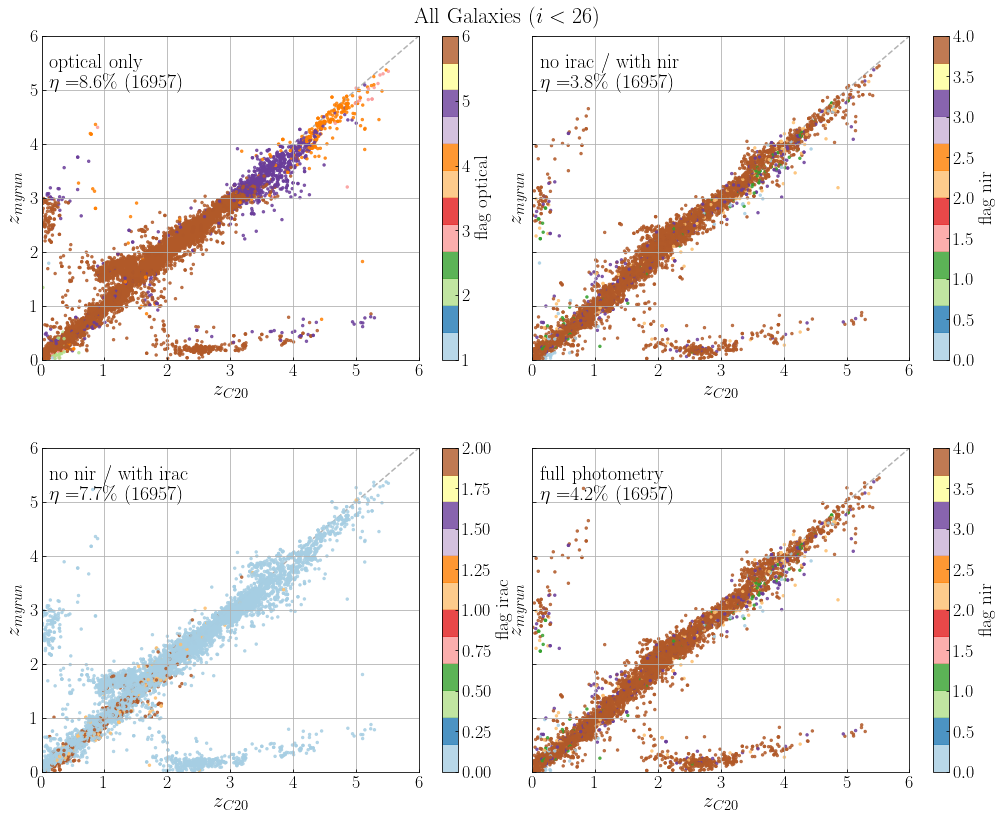

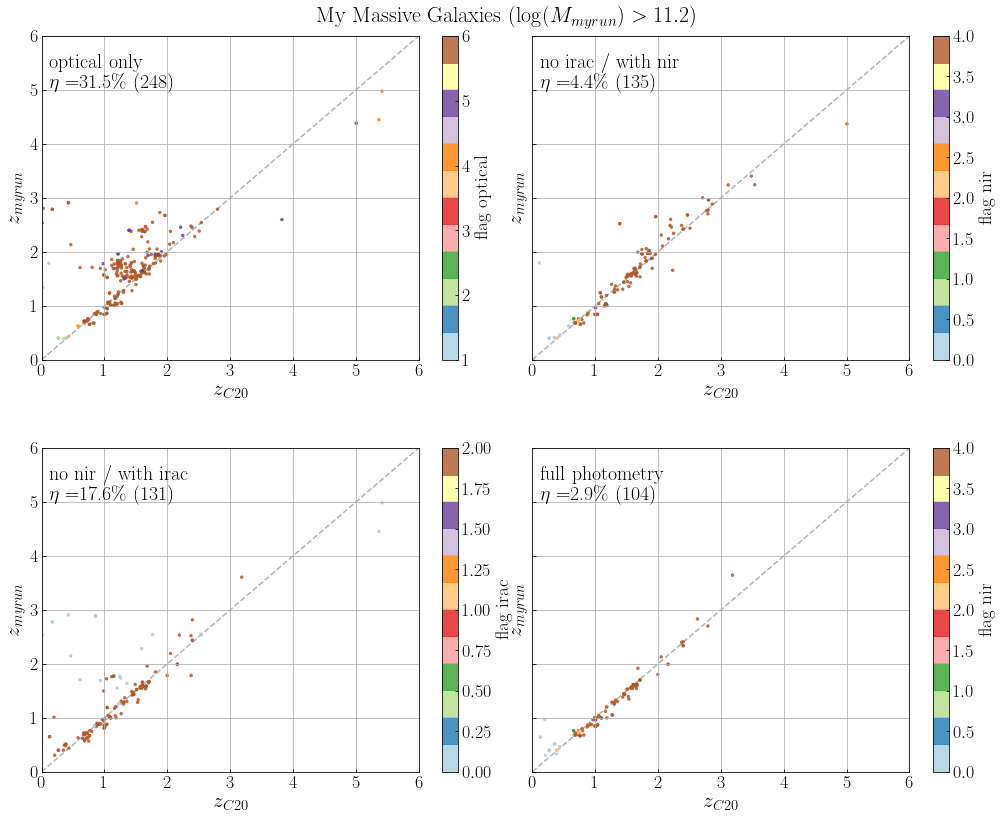

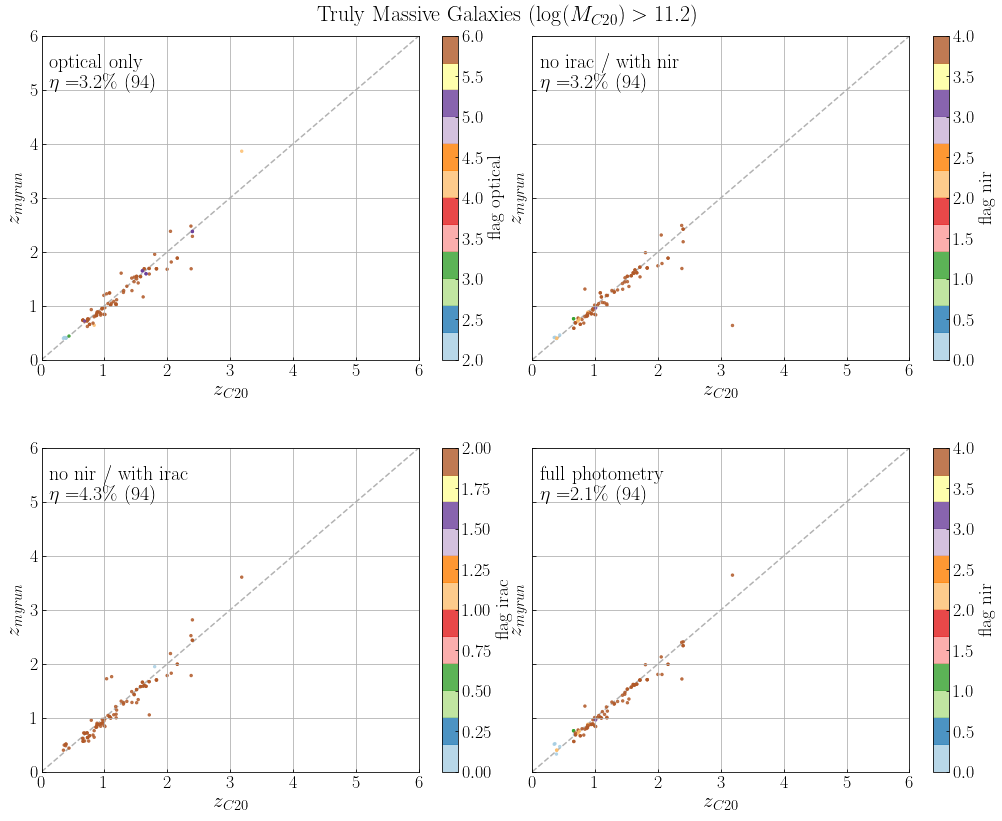

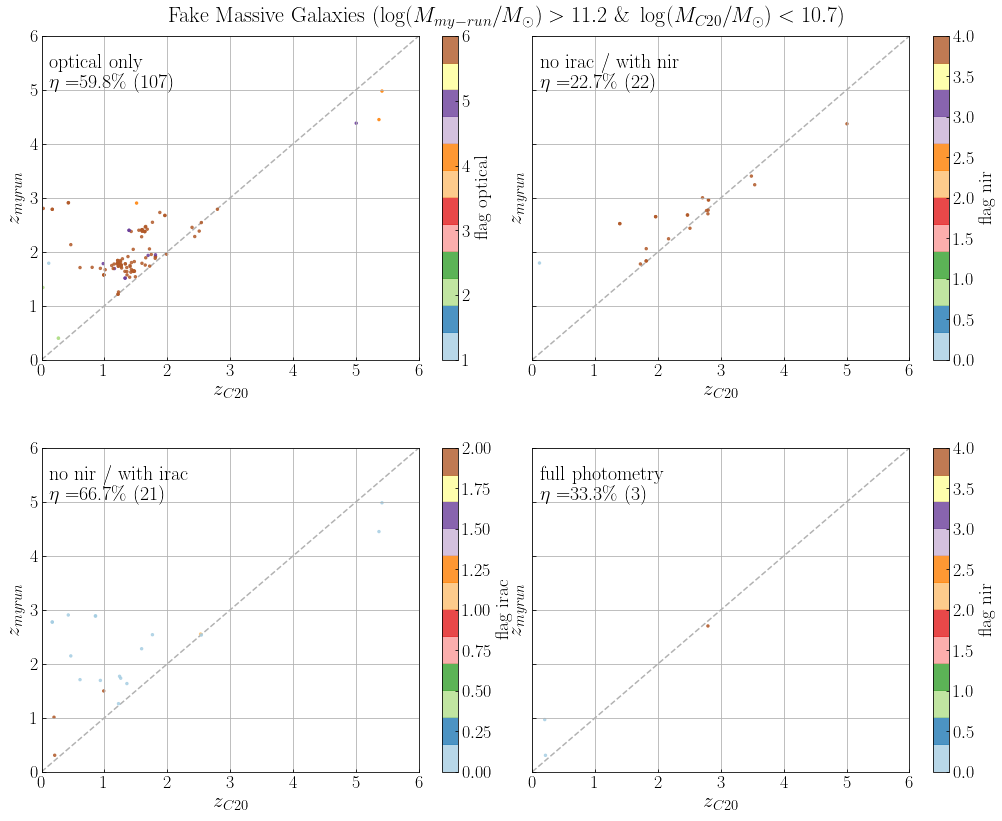

In [12]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_photoz_comparison.pdf")
z_keyname = 'Z_ML_1'
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2
        col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<massive_cut-0.5)
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
        
        # COSMOS consistent photoz objects only
        cond = cond & flag_photoz
        
        # plot
        if i==0: print('Number of objects:',len(cond[cond]))
        im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'], cat_output_c20added[cond][z_keyname],s=6,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
        axs[row][col].plot([0,6],[0,6],'--k',alpha=0.3,zorder=0)
        axs[row][col].set_xlim([0,6])
        axs[row][col].set_ylim([0,6])
        axs[row][col].set_xlabel(r'$z_{C20}$',fontsize=21)
        axs[row][col].set_ylabel(r'$z_{myrun}$',fontsize=21)
        axs[row][col].grid()
        cbar = fig.colorbar(im, ax=axs[row][col])
        cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
        # print out outlier fraction
        outlier_factor = 0.15
        num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond][z_keyname])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
        axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond])*100,1))+'\% '+'('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4,w_pad=-1.5)
    pdf.savefig( fig )
pdf.close()

##### outlier fraction as a function of redshift

##### purity and completeness for massive gal selection


In [15]:
cat_output_no_nir_mass_name = output_dir+'cat_out_nonir_il_formass.fits'
cat_output_c20added = Table.read(cat_output_no_nir_mass_name.replace('.fits','c20added.fits'))
cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
# cat_output_c20added = cat_output_c20added[cat_output_c20added['Z_ML_1']>1.5]
cat_output_c20added = cat_output_c20added[cat_output_c20added['flag_photoz']==1]

# before removing flag_irac==0
print("before removing irac non-detectioons")
cat_my_massive = cat_output_c20added[cat_output_c20added['MASS_MED_massrun']>11.2]
cat_my_massive_true = cat_my_massive[cat_my_massive['lp_mass_med']>11.2]
print('purity      ', len(cat_my_massive_true),len(cat_my_massive))

cat_c20_massive = cat_output_c20added[cat_output_c20added['lp_mass_med']>11.2]
print('completeness',len(cat_c20_massive[cat_c20_massive['MASS_MED_massrun']>11.2]),len(cat_c20_massive))
print('mass agree:',len(cat_c20_massive[abs(cat_c20_massive['MASS_MED_massrun']-cat_c20_massive['lp_mass_med'])<0.3]))

# after removing flag_irac==0
print('=============================')
print("after removing irac non-detectioons")
cat_output_c20added_irac = cat_output_c20added[cat_output_c20added['flag_irac']==2]
cat_my_massive_irac = cat_output_c20added_irac[cat_output_c20added_irac['MASS_MED_massrun']>11.2]
print('purity      ', len(cat_my_massive_irac[cat_my_massive_irac['lp_mass_med']>11.2]),len(cat_my_massive_irac))

cat_c20_massive_irac = cat_output_c20added_irac[cat_output_c20added_irac['lp_mass_med']>11.2]
print('completeness',len(cat_c20_massive_irac[cat_c20_massive_irac['MASS_MED_massrun']>11.2]),len(cat_c20_massive_irac))
print('mass agree:',len(cat_c20_massive_irac[abs(cat_c20_massive_irac['MASS_MED_massrun']-cat_c20_massive_irac['lp_mass_med'])<0.3]))


before removing irac non-detectioons
purity       66 131
completeness 66 94
mass agree: 85
after removing irac non-detectioons
purity       66 110
completeness 66 93
mass agree: 85


/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


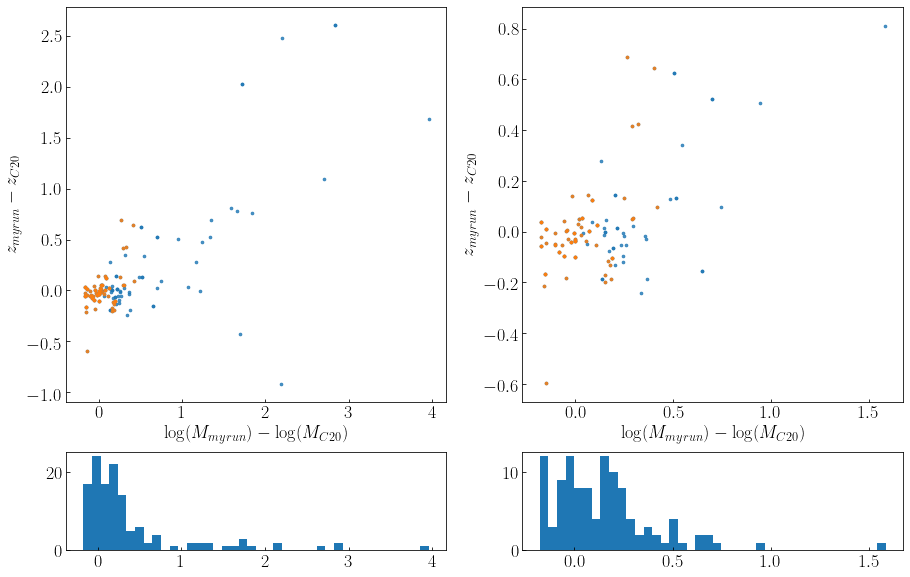

In [16]:
fig, axs = plt.subplots(2, 2, figsize = (15, 10),gridspec_kw={'height_ratios':[4,1]})
z_keyname = 'Z_ML_1'

cond = cat_my_massive['lp_mass_med']>11.2
axs[0][0].scatter(cat_my_massive['MASS_MED_massrun']-cat_my_massive['lp_mass_med'],cat_my_massive[z_keyname]-cat_my_massive['lp_zPDF'],s=7,alpha=0.8)
axs[0][0].scatter(cat_my_massive[cond]['MASS_MED_massrun']-cat_my_massive[cond]['lp_mass_med'],cat_my_massive[cond][z_keyname]-cat_my_massive[cond]['lp_zPDF'],s=7,alpha=0.8)
axs[0][0].set_xlabel(r'$\log(M_{myrun}) - \log(M_{C20})$',fontsize=18)
axs[0][0].set_ylabel(r'$z_{myrun}- z_{C20}$',fontsize=18)

cond = cat_my_massive_irac['lp_mass_med']>11.2
axs[0][1].scatter(cat_my_massive_irac['MASS_MED_massrun']-cat_my_massive_irac['lp_mass_med'],cat_my_massive_irac[z_keyname]-cat_my_massive_irac['lp_zPDF'],s=7,alpha=0.8)
axs[0][1].scatter(cat_my_massive_irac[cond]['MASS_MED_massrun']-cat_my_massive_irac[cond]['lp_mass_med'],cat_my_massive_irac[cond][z_keyname]-cat_my_massive_irac[cond]['lp_zPDF'],s=7,alpha=0.8)
axs[0][1].set_xlabel(r'$\log(M_{myrun}) - \log(M_{C20})$',fontsize=18)
axs[0][1].set_ylabel(r'$z_{myrun}- z_{C20}$',fontsize=19)

axs[1][0].hist(cat_my_massive['MASS_MED_massrun']-cat_my_massive['lp_mass_med'],bins=40)
axs[1][1].hist(cat_my_massive_irac['MASS_MED_massrun']-cat_my_massive_irac['lp_mass_med'],bins=40)
plt.show()

##### check matching with SHIRAZ catalog
for massive gals

In [495]:
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
from astropy.io import fits
import aplpy

In [12]:
## load shiraz catalog
cat_shiraz = Table.read('/Volumes/LejaySSD/SHIRAZ_catalogs/COSMOS_scosmos_ext_CH1_newfluxes_errmod.fits')
cond_ch1_shiraz = ( (cat_shiraz['MAG_AUTO'] > 0.) & (cat_shiraz['MAG_AUTO'] < 50) & (cat_shiraz['MAGERR_AUTO'] > 0.) & (cat_shiraz['MAGERR_AUTO'] < 0.5) )

# geometry cut (central cosmos)
cat_shiraz_select = cat_shiraz[cond_ch1_shiraz]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['ALPHA_J2000']>149.7]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['ALPHA_J2000']<150.3]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['DELTA_J2000']>2.0]
cat_shiraz_select = cat_shiraz_select[cat_shiraz_select['DELTA_J2000']<2.5]

In [430]:
# check massives (in optical+irac phot catalog)
cat_output_c20added = Table.read(cat_output_no_nir_mass_name.replace('.fits','c20added.fits'))
cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]

# add flag_irac column
cond_ch1 = ( (cat_output_c20added['MAG_AUTO_CH1_CORR'] > 0.) & (cat_output_c20added['MAG_AUTO_CH1_CORR'] < 50.) & (cat_output_c20added['MAGERR_AUTO_CH1_CORR'] > 0.) & (cat_output_c20added['MAGERR_AUTO_CH1_CORR'] < 0.5) )
cond_ch2 = ( (cat_output_c20added['MAG_AUTO_CH2_CORR'] > 0.) & (cat_output_c20added['MAG_AUTO_CH2_CORR'] < 50.) & (cat_output_c20added['MAGERR_AUTO_CH2_CORR'] > 0.) & (cat_output_c20added['MAGERR_AUTO_CH2_CORR'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int)
flag_irac_col = Column(name='flag_irac',data=flag_irac)
if 'flag_irac' not in cat_output_c20added.keys():
    cat_output_c20added.add_column(flag_irac_col)

# condition
massive_cut=11.2
# cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<(massive_cut-0.5))  # fake massive
cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)  # my massive

massive_gals_selected = cat_output_c20added[cond]
massive_gals_selected.write('lp_massive_gal_check.fits',overwrite=True)

# cat_output_c20added[cond]['ID_1','i','MAG_AUTO_CH1_CORR','MAGERR_AUTO_CH1_CORR','MAG_AUTO_CH2_CORR','MAGERR_AUTO_CH2_CORR','flag_irac'].show_in_notebook()

/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/lejay/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/lejay/anaconda3/lib/python3.6

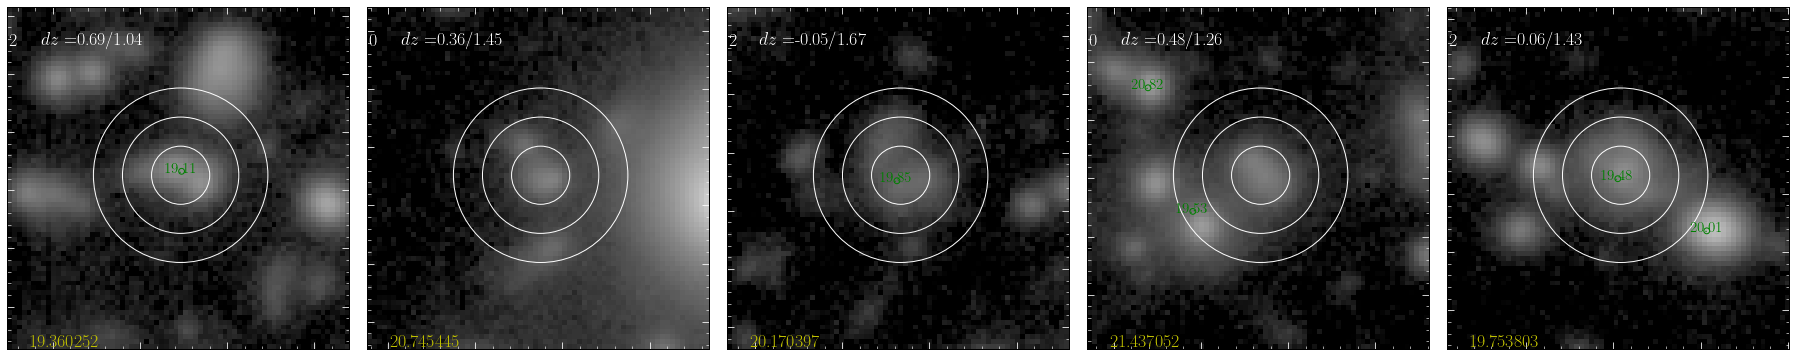

In [531]:
fig = plt.figure(figsize=(25, 5))

massive_gals_checked = Table.read('lp_massive_gal_check/lp_massive_gal_check_matched.fits')
for i, gal in enumerate(massive_gals_checked[15:20]):
    row = i // 5
    col = i % 5
    
    # plot nearby shiraz galaxies
    cat_shiraz_neighbor = cat_shiraz_select[abs(cat_shiraz_select['ALPHA_J2000']-gal['RA'])<5./3600]
    cat_shiraz_neighbor = cat_shiraz_neighbor[abs(cat_shiraz_neighbor['DELTA_J2000']-gal['DEC'])<5./3600]
    
    # record separation and magnitude difference (between C20 mag and SHIRAZ mag of the closest match)
    coord_gal = SkyCoord(SkyCoord(gal['RA'] * u.deg, gal['DEC'] * u.deg))
    coord_shiraz = SkyCoord(cat_shiraz_neighbor['ALPHA_J2000']*u.deg, cat_shiraz_neighbor['DELTA_J2000']*u.deg)
    if len(cat_shiraz_neighbor)>0:
        idx, sep2d, dis3d = match_coordinates_sky(coord_gal, coord_shiraz)
        sep_list.append(sep2d.value[0]*3600)
        mag_diff_list.append(cat_shiraz_neighbor[idx]['MAG_AUTO']-gal['IRAC_CH1_MAG_1'])
        if abs(gal['Z_BEST'] - gal['lp_zPDF'])< 0.15*(1+gal['lp_zPDF']):
            photoz_flag.append(0)
        else:
            photoz_flag.append(1)
    
    # plot
    gc = aplpy.FITSFigure('lp_massive_gal_check/cutout_'+str(gal['ID'])+'.fits',figure=fig,subplot=[0.1+col*0.2, 0.1+row*0.1, 0.19, 0.95])
    gc.show_grayscale(stretch='log',vmin=2,vmax=5e3)
    gc.hide_yaxis_label()
    gc.hide_ytick_labels()
    gc.hide_xaxis_label()
    gc.hide_xtick_labels()

    for r in [1,2,3]:
        gc.show_circles(gal['RA'],gal['DEC'],radius=r/3600.,color='white')
        
    for gal_shiraz in cat_shiraz_neighbor:
        gc.add_label(gal_shiraz['ALPHA_J2000'],gal_shiraz['DELTA_J2000']+0.1/3600,str(round(gal_shiraz['MAG_AUTO'],2)),fontsize=15,color='g')
            
    gc.show_circles(cat_shiraz_neighbor['ALPHA_J2000'], cat_shiraz_neighbor['DELTA_J2000'],radius=0.1/3600.,color='g')
    gc.add_label(0.017,0.9,gal['flag_irac'],relative=True,fontsize=18,color='w')
    gc.add_label(0.25,0.9,'$dz=$'+str(round(gal['Z_BEST'] - gal['lp_zPDF'],2))+'/'+str(round(gal['lp_zPDF'],2)),relative=True,fontsize=18,color='w')
    gc.add_label(0.17,0.02, gal['IRAC_CH1_MAG_1'],relative=True,fontsize=18,color='y')

# plt.tight_layout(w_pad=-2,h_pad=1)
# plt.savefig('/Users/lejay/Desktop/shiraz_match_check.pdf')   

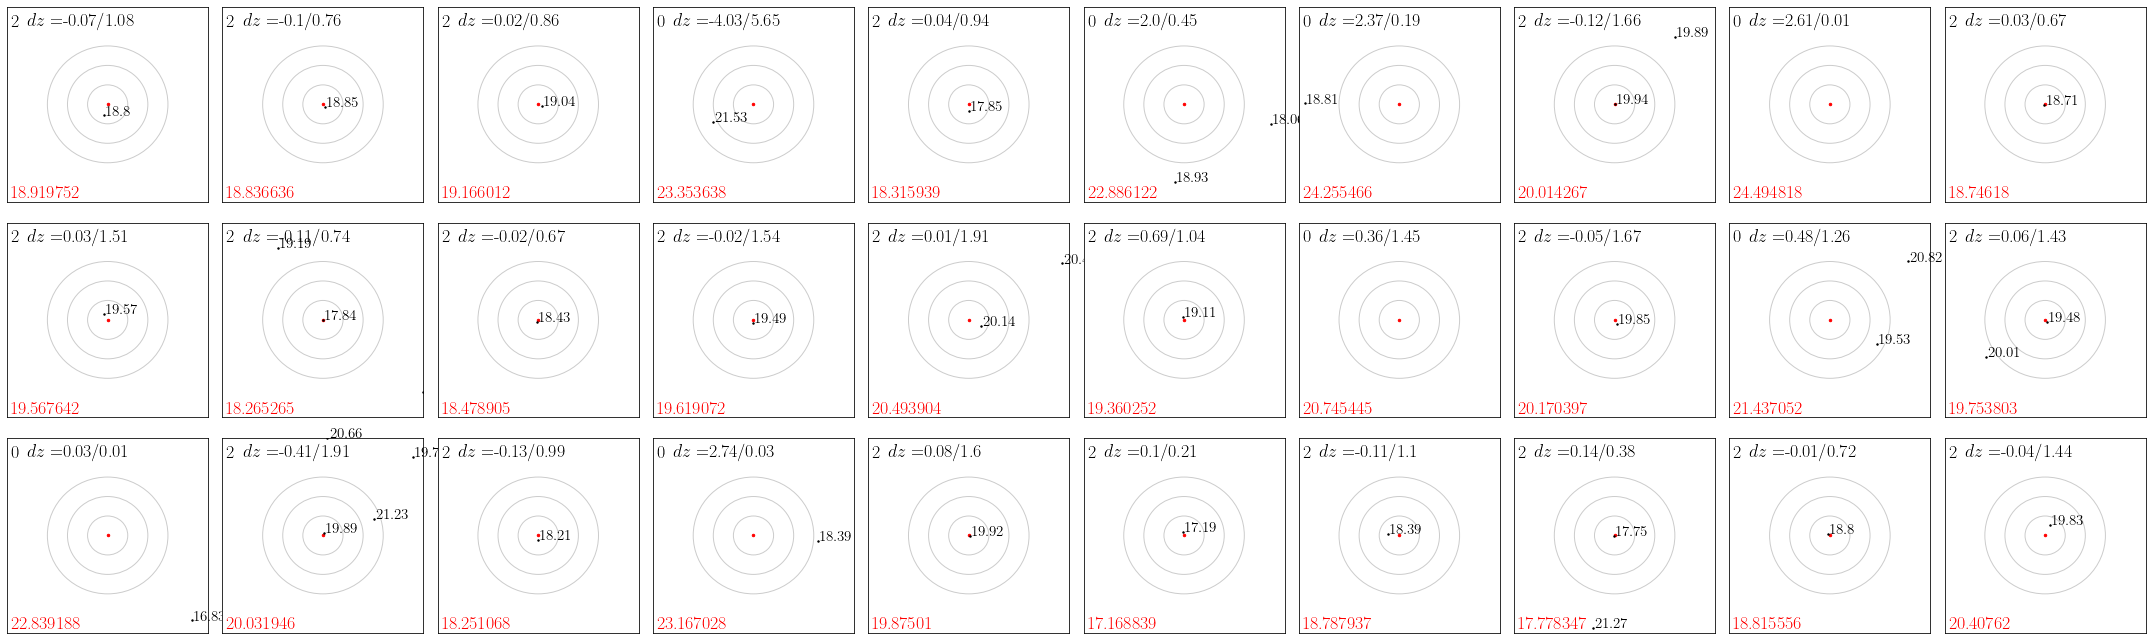

In [435]:
fig, axs = plt.subplots(3, 10, figsize = (30,9))

sep_list = []
mag_diff_list = [] 
photoz_flag = []
for i, gal in enumerate(massive_gals_checked[:30]):
    row = i // 10
    col = i % 10
    
    # plot nearby shiraz galaxies
    cat_shiraz_neighbor = cat_shiraz_select[abs(cat_shiraz_select['ALPHA_J2000']-gal['RA'])<5./3600]
    cat_shiraz_neighbor = cat_shiraz_neighbor[abs(cat_shiraz_neighbor['DELTA_J2000']-gal['DEC'])<5./3600]
    
    # record separation and magnitude difference (between C20 mag and SHIRAZ mag of the closest match)
    coord_gal = SkyCoord(SkyCoord(gal['RA'] * u.deg, gal['DEC'] * u.deg))
    coord_shiraz = SkyCoord(cat_shiraz_neighbor['ALPHA_J2000']*u.deg, cat_shiraz_neighbor['DELTA_J2000']*u.deg)
    if len(cat_shiraz_neighbor)>0:
        idx, sep2d, dis3d = match_coordinates_sky(coord_gal, coord_shiraz)
        sep_list.append(sep2d.value[0]*3600)
        mag_diff_list.append(cat_shiraz_neighbor[idx]['MAG_AUTO']-gal['IRAC_CH1_MAG_1'])
        if abs(gal['Z_BEST'] - gal['lp_zPDF'])< 0.15*(1+gal['lp_zPDF']):
            photoz_flag.append(0)
        else:
            photoz_flag.append(1)
    
    # show the chi2 image as background
    
    
    # plot
    axs[row][col].scatter(gal['RA'],gal['DEC'],s=6,c='r')
    for r in [1,2,3]:
        circle = plt.Circle((gal['RA'],gal['DEC']),r/3600.,fill=False,alpha=0.2)
        axs[row][col].add_patch(circle)
        
    for gal_shiraz in cat_shiraz_neighbor:
        axs[row][col].annotate(round(gal_shiraz['MAG_AUTO'],2),xy=([gal_shiraz['ALPHA_J2000']+0.1/3600,gal_shiraz['DELTA_J2000']]),xycoords='data',fontsize=15,color='k')
            
    axs[row][col].scatter(cat_shiraz_neighbor['ALPHA_J2000'], cat_shiraz_neighbor['DELTA_J2000'],s=2,c='k',alpha=1)
    axs[row][col].annotate(gal['flag_irac'],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=18,color='k')
    axs[row][col].annotate('$dz=$'+str(round(gal['Z_BEST'] - gal['lp_zPDF'],2))+'/'+str(round(gal['lp_zPDF'],2)),xy=([0.1,0.9]),xycoords='axes fraction',fontsize=18,color='k')
    axs[row][col].annotate(gal['IRAC_CH1_MAG_1'],xy=([0.02,0.02]),xycoords='axes fraction',fontsize=18,color='r')
    axs[row][col].set_xlim([gal['RA']-5/3600.,gal['RA']+5/3600.])
    axs[row][col].set_ylim([gal['DEC']-5/3600.,gal['DEC']+5/3600.])
    axs[row][col].get_xaxis().set_visible(False)
    axs[row][col].get_yaxis().set_visible(False)

plt.tight_layout(w_pad=-2,h_pad=1)
plt.savefig('/Users/lejay/Desktop/shiraz_match_check.pdf')

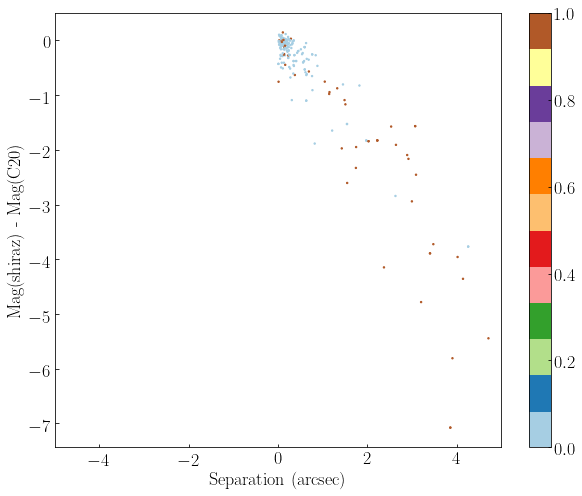

In [69]:
# summarize plot
fig, axs = plt.subplots(1, 1, figsize = (10, 8),sharey=True)

plt.scatter(sep_list,mag_diff_list, s=2,c=photoz_flag,cmap='Paired') 
plt.xlim([-5,5])

plt.xlabel('Separation (arcsec)',fontsize=18)
plt.ylabel('Mag(shiraz) - Mag(C20)',fontsize=18)
plt.colorbar()

# plt.ylim([-5,5])

#### mass vs redshift comparison plots

In [14]:
massive_cut = 11.2

Number of objects: 16957


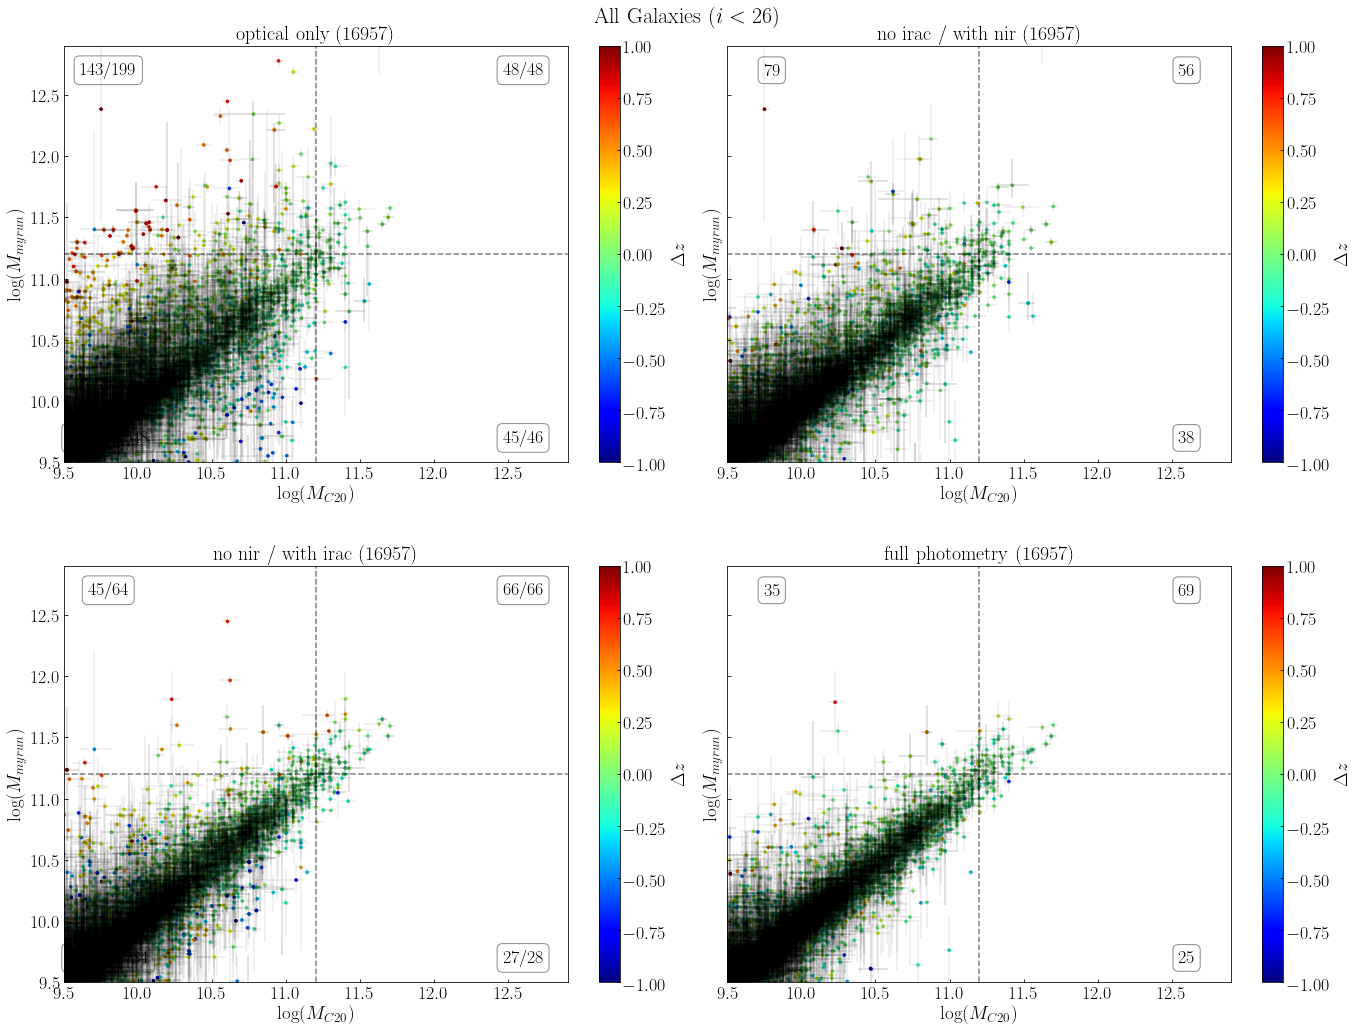

In [139]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_mass_comparison.pdf")
fig, axs = plt.subplots(2, 2, figsize = (20, 15),sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2; col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    
    cond = np.ones(len(cat_output_c20added)).astype(bool)
    fig_title = 'All Galaxies ($i<26$)'

    # COSMOS consistent photoz objects only
    cond = cond & flag_photoz
        
    if i==0: print('Number of objects:',len(cond[cond]))
    x = cat_output_c20added[cond]['lp_mass_med']
    y = cat_output_c20added[cond]['MASS_MED_massrun']
    x_err = [x-cat_output_c20added[cond]['lp_mass_med_min68'],cat_output_c20added[cond]['lp_mass_med_max68']-x]
    y_err = [y-cat_output_c20added[cond]['MASS_INF'],cat_output_c20added[cond]['MASS_SUP']-y]
    axs[row][col].errorbar(x, y,yerr=y_err,xerr=x_err,fmt='.',zorder=10,color='k',alpha=0.08) 
    im = axs[row][col].scatter(x,y,s=7,c=cat_output_c20added[cond]['Z_ML_1']-cat_output_c20added[cond]['lp_zPDF'],vmin=-1,vmax=1,cmap='jet',zorder=0)
    
    axs[row][col].set_xlim([9.5,12.9])
    axs[row][col].set_ylim([9.5,12.9])
    axs[row][col].set_xlabel(r'$\log(M_{C20})$',fontsize=19)
    axs[row][col].set_ylabel(r'$\log(M_{myrun})$',fontsize=19)
    axs[row][col].set_title(filter_selections[i]+' ('+str(len(flag_list[i][cond]))+')', fontsize=20)
    axs[row][col].axvline(x=11.2,ymin=0,ymax=1,color='k',ls='--',alpha=0.5)
    axs[row][col].axhline(y=11.2,xmin=0,xmax=1,color='k',ls='--',alpha=0.5)
    bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    for quad in [(-1,-1),(-1,1),(1,-1),(1,1)]:
        quad_x = quad[0]
        quad_y = quad[1]
        mass_cut_cond_x =  quad_x*cat_output_c20added['lp_mass_med']>quad_x*11.2
        mass_cut_cond_y =  quad_y*cat_output_c20added['MASS_MED_massrun']>quad_y*11.2
        if 'nonir' not in cat_name:
            axs[row][col].text(11.2+quad_x*1.4, 11.2+quad_y*1.5, str(len(cat_output_c20added[cond & mass_cut_cond_x & mass_cut_cond_y])), ha="center", va="center", size=18, bbox=bbox_props)
        else:
            num_all = len(cat_output_c20added[cond & mass_cut_cond_x & mass_cut_cond_y])
            num_flag_irac1 = len(cat_output_c20added[cond & mass_cut_cond_x & mass_cut_cond_y & (flag_irac>=1)])
            axs[row][col].text(11.2+quad_x*1.4, 11.2+quad_y*1.5, str(num_flag_irac1)+'/'+str(num_all), ha="center", va="center", size=18, bbox=bbox_props)
            
    cbar = fig.colorbar(im, ax=axs[row][col])
    cbar.ax.set_ylabel(r'$\Delta z$',fontsize=19)
    
plt.suptitle(fig_title,fontsize=22)
plt.tight_layout(pad=4, w_pad=0)
pdf.savefig( fig )
pdf.close()

Number of objects: 19525
Number of objects: 94
Number of objects: 286
Number of objects: 136


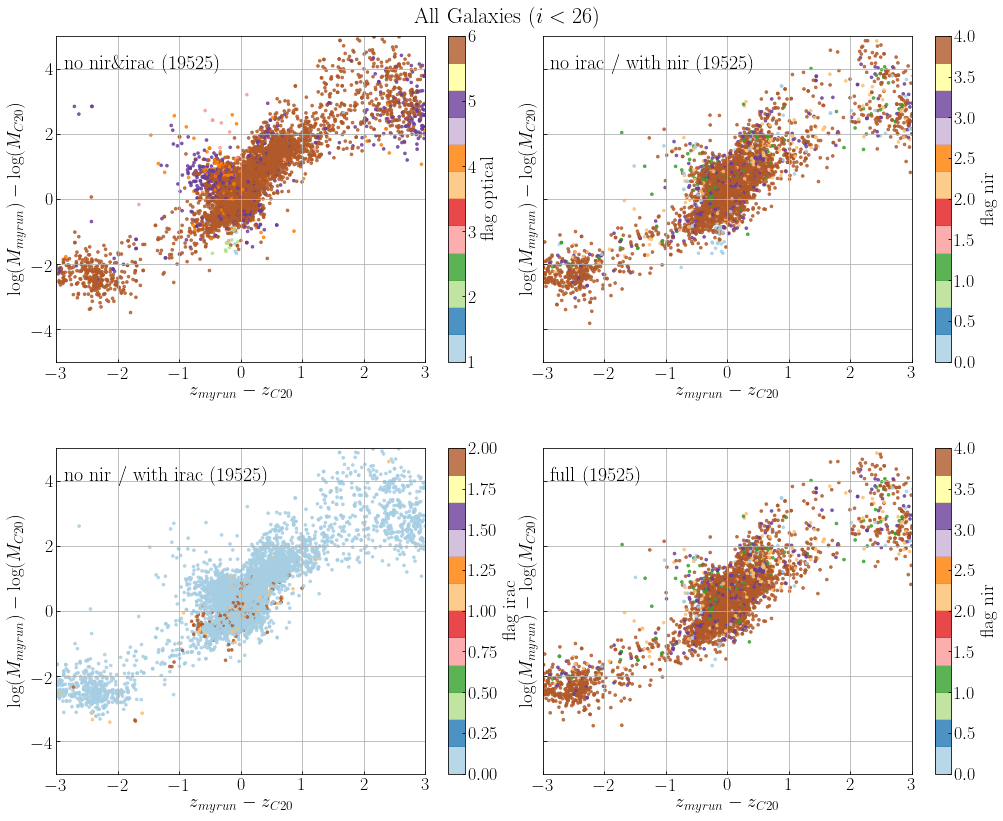

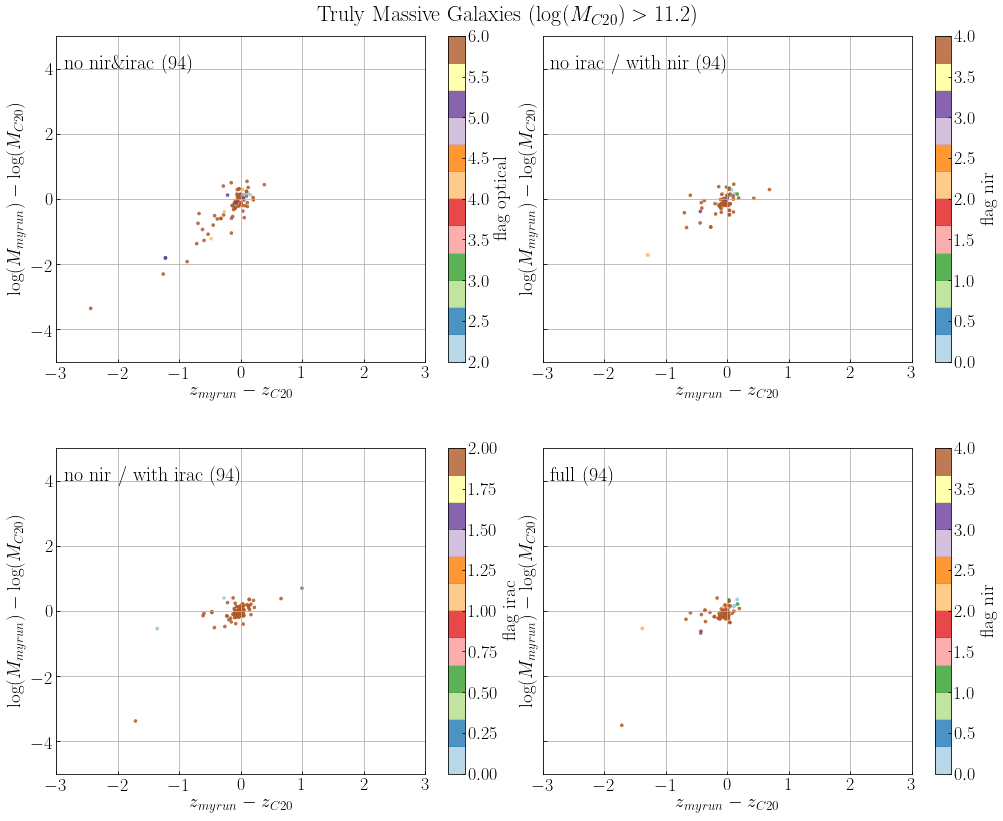

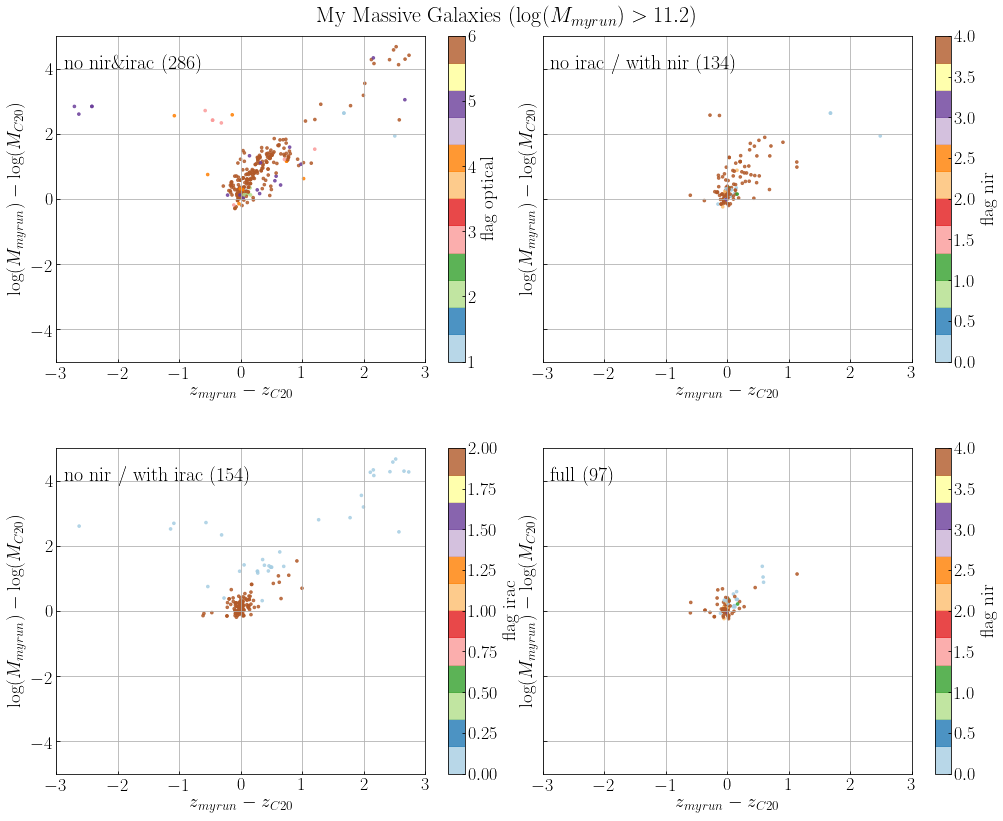

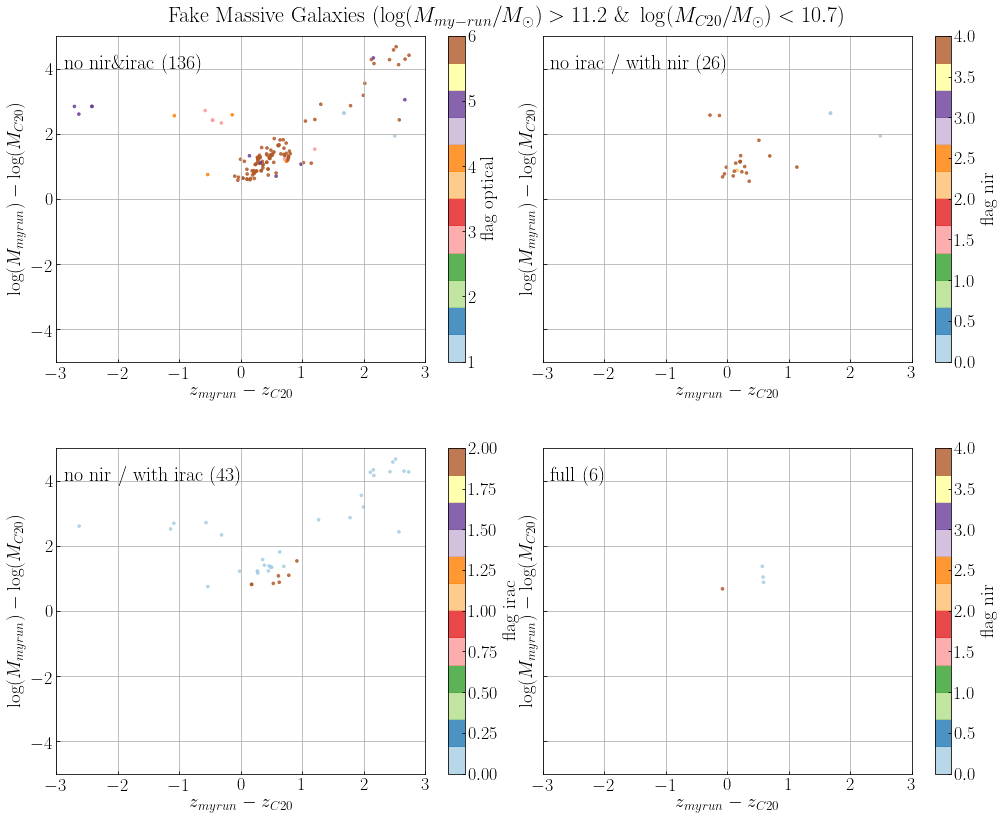

In [135]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_mass_photoz_diff_comparison.pdf")
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12),sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2; col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    
        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<(massive_cut-0.5))
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
        
        # COSMOS consistent photoz objects only
        cond = cond & flag_photoz
        
        if i==0: print('Number of objects:',len(cond[cond]))
        im = axs[row][col].scatter(cat_output_c20added[cond]['Z_ML_1']-cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['MASS_MED_massrun']-cat_output_c20added[cond]['lp_mass_med'],s=7,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
        axs[row][col].set_xlim([-3,3])
        axs[row][col].set_ylim([-5,5])
        axs[row][col].set_xlabel(r'$z_{myrun}- z_{C20}$',fontsize=19)
        axs[row][col].set_ylabel(r'$\log(M_{myrun}) - \log(M_{C20})$',fontsize=19)
        axs[row][col].grid()
        axs[row][col].annotate(filter_selections[i]+' ('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
    
        cbar = fig.colorbar(im, ax=axs[row][col])
        cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4, w_pad=-1)
    pdf.savefig( fig )
pdf.close()

Number of objects: 19525
Number of objects: 94
Number of objects: 286
Number of objects: 136


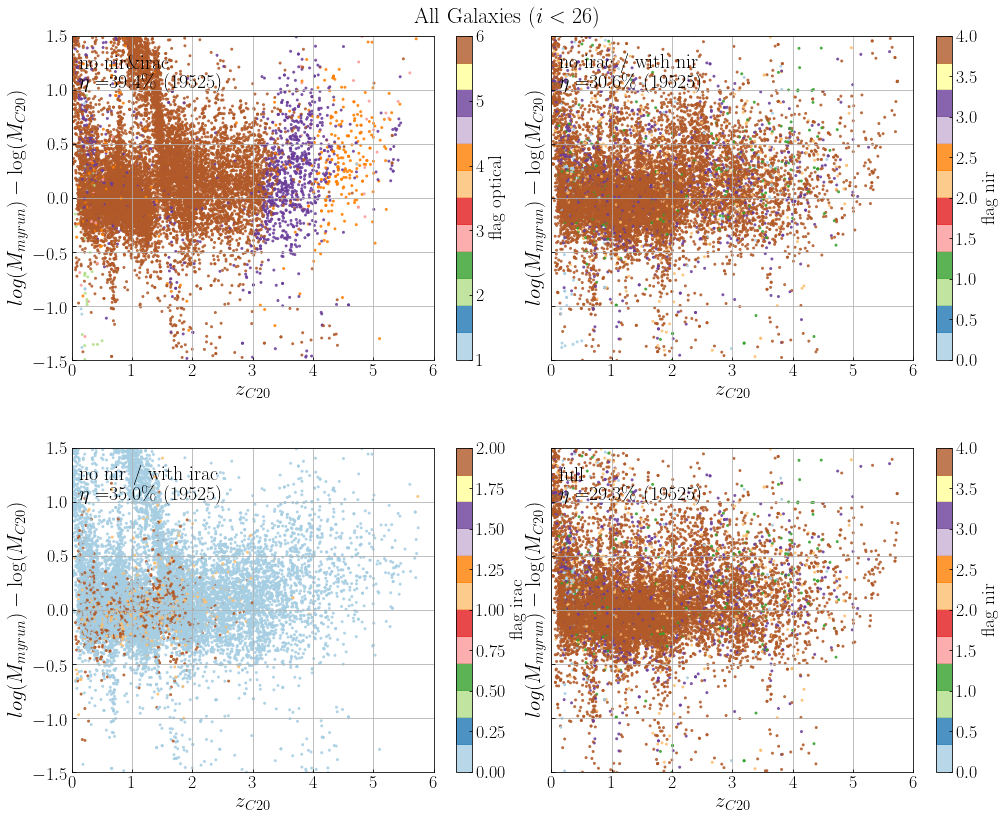

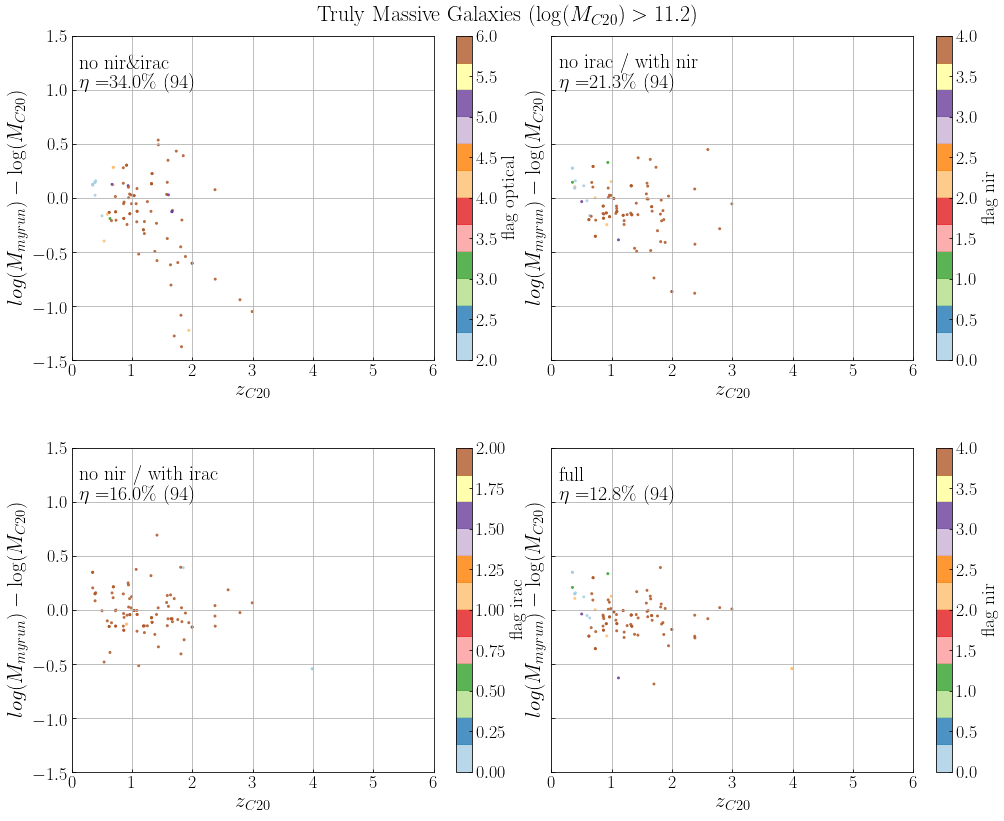

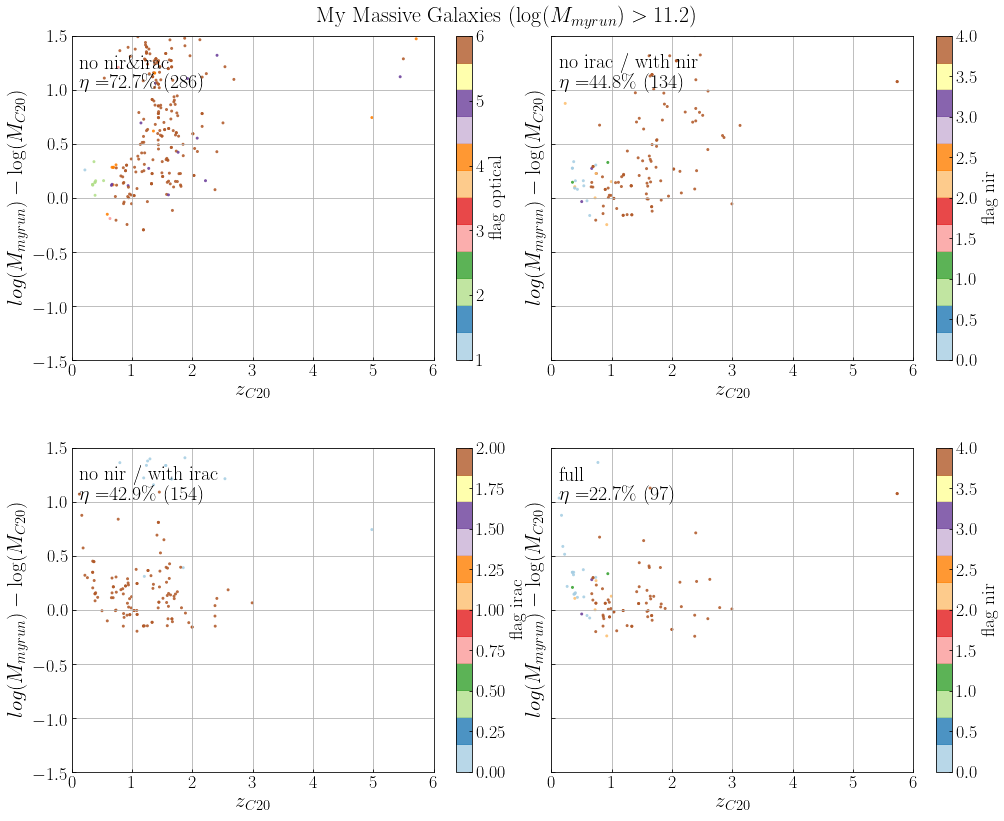

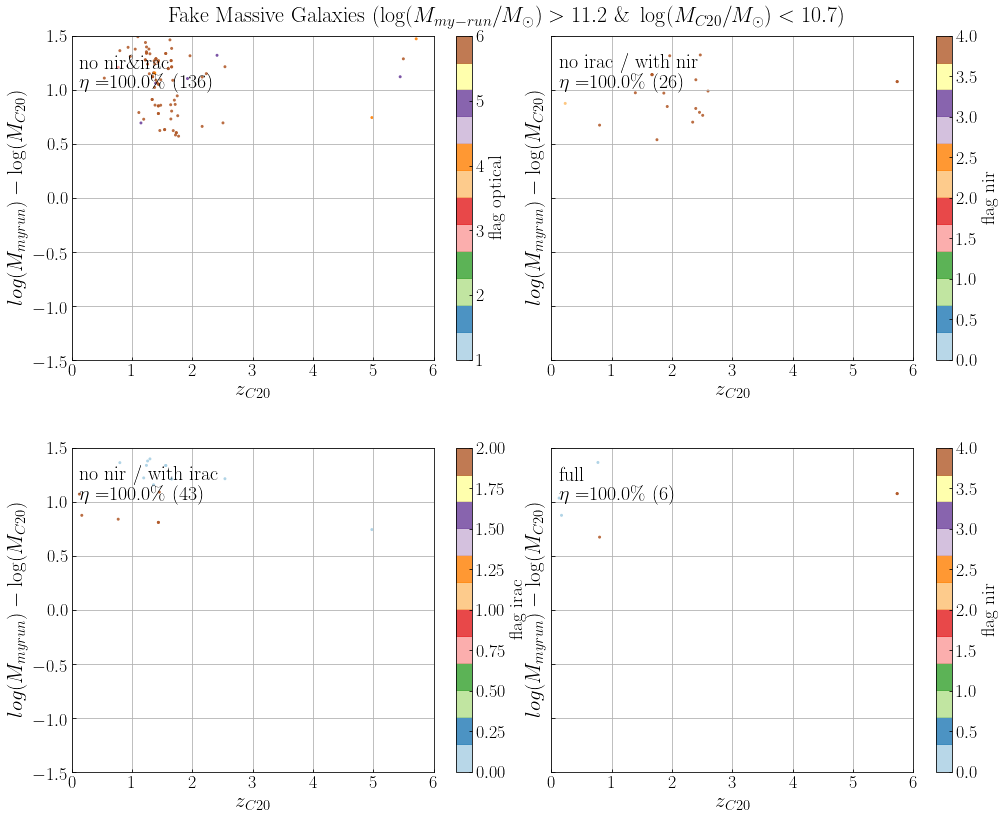

In [136]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_mass_photoz_comparison.pdf")
for selection in ['all','massive','massive_c20','fake_massive']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2; col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]

        # select subsample
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<massive_cut-0.5)
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
        
        # COSMOS consistent photoz objects only
        cond = cond & flag_photoz
        
        # plot
        if i==0: print('Number of objects:',len(cond[cond]))
        im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['MASS_MED_massrun'] - cat_output_c20added[cond]['lp_mass_med'],s=4,c=flag_list[i][cond],alpha=0.8,cmap='Paired')
        axs[row][col].set_xlabel(r'$z_{C20}$',fontsize=21)
        axs[row][col].set_ylabel(r'$log(M_{myrun}) - \log(M_{C20})$',fontsize=21)
        axs[row][col].set_xlim([0,6])
        axs[row][col].set_ylim([-1.5,1.5])
        axs[row][col].grid()
        axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        
         # print out outlier fraction
        outlier_factor = 0.3
        num_outliers = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['MASS_MED_massrun'] - cat_output_c20added[cond]['lp_mass_med'])>outlier_factor])
        axs[row][col].annotate('$\eta=$'+str(round(num_outliers/len(cat_output_c20added[cond])*100,1))+'\% '+'('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
        cbar = fig.colorbar(im, ax=axs[row][col])
        cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4, w_pad=-1)
    pdf.savefig( fig )
pdf.close()

In [43]:
def percentile_16(arr):
    return np.percentile(arr,16)

def percentile_84(arr):
    return np.percentile(arr,84)

median dM's
optical only dM=0.01 , massive dM=0.53


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning:

invalid value encountered in greater



median dM's
no irac / with nir dM=-0.04 , massive dM=0.26


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning:

invalid value encountered in greater



median dM's
no nir / with irac dM=-0.01 , massive dM=0.11


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning:

invalid value encountered in greater



median dM's
full photometry dM=-0.04 , massive dM=0.06


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning:

invalid value encountered in greater



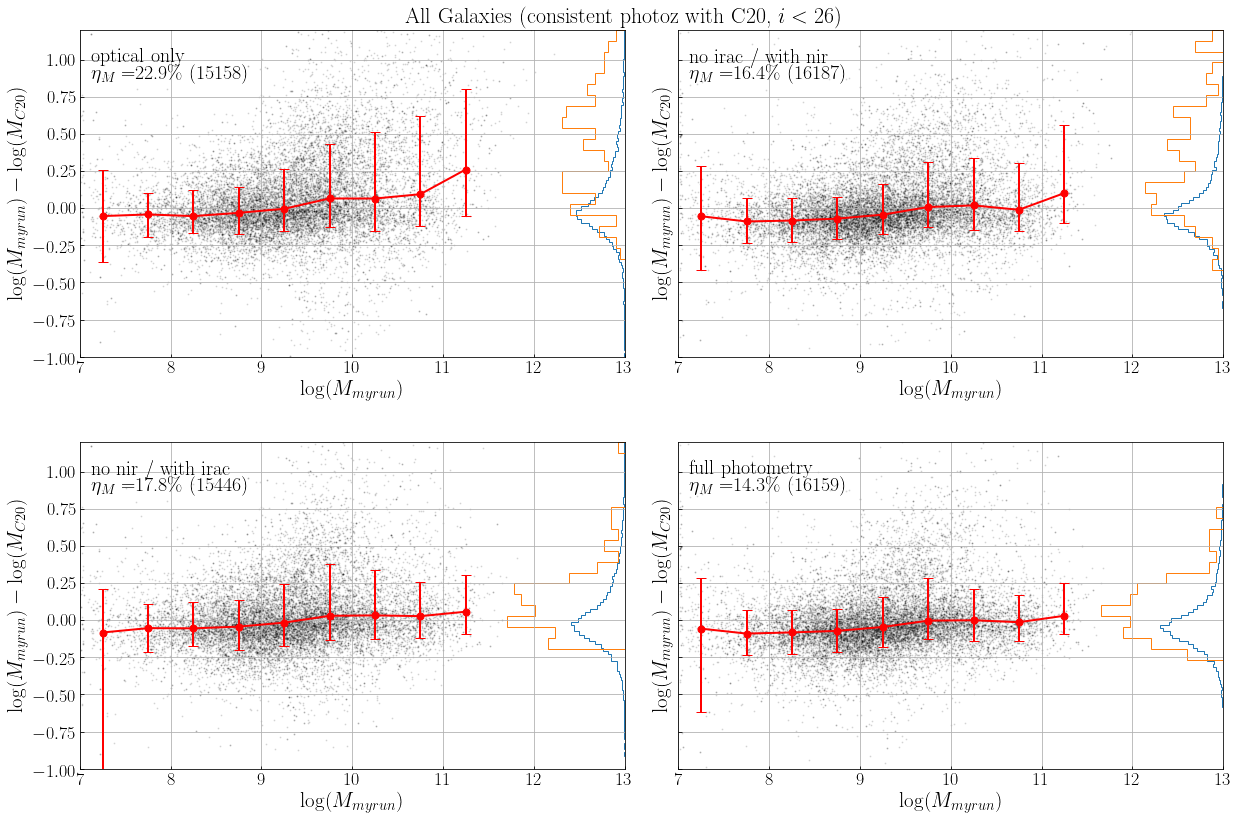

In [104]:
pdf = matplotlib.backends.backend_pdf.PdfPages("/Users/lejay/Desktop/lephare_mass_photoz_comparison.pdf")
fig, axs = plt.subplots(2, 2, figsize = (18, 12), sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2; col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    fig_title = 'All Galaxies (consistent photoz with C20, $i<26$)'
        
    # COSMOS consistent photoz objects only
    cond_photoz_match = abs(cat_output_c20added['Z_BEST'] - cat_output_c20added['lp_zPDF'])<0.15*(1+cat_output_c20added['lp_zPDF'])
    cond = flag_photoz & cond_photoz_match
       
    # data to plot
    cat_tmp = cat_output_c20added[cond]
    x = np.array(cat_tmp['MASS_MED_massrun'])
    y = np.array(cat_tmp['MASS_MED_massrun'] - cat_tmp['lp_mass_med'])
    y[np.isnan(y)]=-99
    y_massive_gal = y[cat_tmp['MASS_MED_massrun']>11.2]
    
    # plot
    im = axs[row][col].scatter(x,y,s=1,c='k',alpha=0.1)
    
    # running median
    step=0.5
    medians,bin_edges,bin_numbers = binned_statistic(x, y, statistic='median', bins=np.arange(7,12,step))
    per16,bin_edges,bin_numbers = binned_statistic(x, y, statistic=percentile_16, bins=np.arange(7,12,step))
    per84,bin_edges,bin_numbers = binned_statistic(x, y, statistic=percentile_84, bins=np.arange(7,12,step))
    axs[row][col].errorbar(bin_edges[:-1]+step/2,medians,yerr=[medians-per16,per84-medians],fmt='o-',color='r',linewidth=2,capsize=5,markersize=7)
    
    # histogram for delta_M
    axs[row][col].hist(y,bins=100,range=(-1,1.2),orientation='horizontal',weights=-10*np.ones(len(y))/len(y),bottom=13,histtype='step')
    axs[row][col].hist(y_massive_gal,bins=30,range=(-1,1.2),orientation='horizontal',weights=-8*np.ones(len(y_massive_gal))/len(y_massive_gal),bottom=13,histtype='step')
    print("median dM's")
    print(filter_selections[i],'dM='+str(round(np.median(y),2)),', massive dM='+str(round(np.median(y_massive_gal),2)))
    
    axs[row][col].set_xlabel(r'$\log(M_{myrun})$',fontsize=21)
    axs[row][col].set_ylabel(r'$\log(M_{myrun}) - \log(M_{C20})$',fontsize=21)
    axs[row][col].set_xlim([7,13])
    axs[row][col].set_ylim([-1,1.2])
    axs[row][col].grid()
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        
    # print out mass outlier fraction
    outlier_factor = 0.3
    num_outliers = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['MASS_MED_massrun'] - cat_output_c20added[cond]['lp_mass_med'])>outlier_factor])
    axs[row][col].annotate('$\eta_{M}=$'+str(round(num_outliers/len(cat_output_c20added[cond])*100,1))+'\% '+'('+str(len(flag_list[i][cond]))+')',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
    # cbar = fig.colorbar(im, ax=axs[row][col])
    # cbar.ax.set_ylabel(flag_name_list[i],fontsize=19)
    
plt.suptitle(fig_title,fontsize=22)
plt.tight_layout(pad=4, w_pad=2)
pdf.savefig(fig)
pdf.close()

Text(0, 0.5, '$M_{sup} - M_{inf}$')

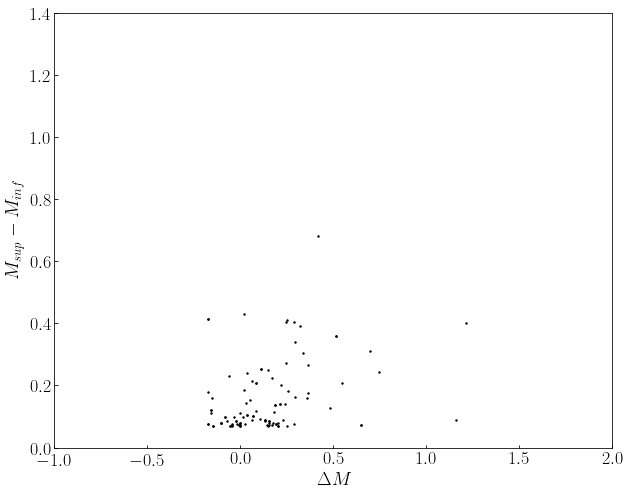

In [116]:
fig, axs = plt.subplots(1, 1, figsize = (10, 8))

cat_name = output_dir+'cat_out_nonir_il_formass.fits'
cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]

cond_photoz_match = abs(cat_output_c20added['Z_BEST'] - cat_output_c20added['lp_zPDF'])<0.15*(1+cat_output_c20added['lp_zPDF'])
cond_massive = cat_output_c20added['MASS_MED_massrun']>11.2
cond = flag_photoz & cond_photoz_match & cond_massive

plt.scatter(cat_output_c20added[cond]['MASS_MED_massrun'] - cat_output_c20added[cond]['lp_mass_med'], cat_output_c20added[cond]['MASS_SUP']-cat_output_c20added[cond]['MASS_INF'],s=2,c='k') 
plt.xlim([-1,2])
plt.ylim([0,1.4])

plt.xlabel(r'$\Delta M$',fontsize=19)
plt.ylabel(r'$M_{sup} - M_{inf}$',fontsize=19)

19525


/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


19525
19525
19525


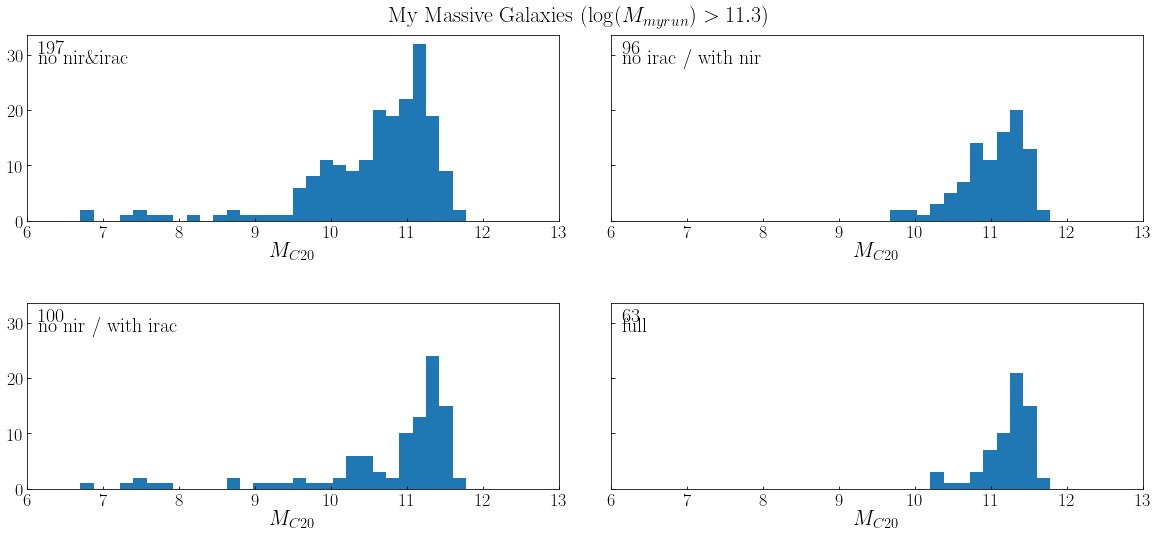

In [93]:
fig, axs = plt.subplots(2, 2, figsize = (17, 8), sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat_output_c20added = cat_output_c20added[cat_output_c20added['lp_zPDF']>0]
    print(len(cat_output_c20added))
    
    # select subsample
#     cond = np.ones(len(cat_output_c20added)).astype(bool)
#     fig_title = 'All Galaxies ($i<26$)'

#     cond = (cat_output_c20added['lp_mass_med']>11.3)
#     fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>11.3$)'
    
    cond = (cat_output_c20added['MASS_MED_massrun']>11.3)
    fig_title = 'My Massive Galaxies ($\log(M_{myrun})>11.3$)'
    
#     cond = (cat_output_c20added['MASS_MED_massrun']>11.3) & (cat_matched['lp_mass_med']<10.8)
#     fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>11.3 ~ \& ~ \log(M_{C20}/M_\odot)<10.8$)'
    
    axs[row][col].hist(cat_output_c20added[cond]['lp_mass_med'],range=(6,13),bins=40)
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.85]),xycoords='axes fraction',fontsize=20,color='k')
    axs[row][col].annotate(len(cat_output_c20added[cond]),xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
    axs[row][col].set_xlim([6,13])
    axs[row][col].set_xlabel(r'$M_{C20}$',fontsize=21)

plt.suptitle(fig_title, fontsize=22)
plt.tight_layout(pad=4)

#### NUVrK diagram

In [22]:
def gv_boundary_2(color1, ic_1, ic_2, slope):
    nuv_1 = ic_1
    nuv_2 = slope*color1 + ic_2
    return np.maximum(nuv_1, nuv_2)

def fraction_score(cat,ic_1, ic_2,slope, diagram_type='',eval_type='q',verbose=False):
    if diagram_type=='NUVrK':
        color1 = cat['MAG_ABS_r'] - cat['MAG_ABS_Ks']
    elif diagram_type=='NUVrz':
        color1 = cat['MAG_ABS_r'] - cat['MAG_ABS_z']
    elif diagram_type=='NUVrJ':
        color1 = cat['MAG_ABS_r'] - cat['MAG_ABS_J']
    else:
        return 1
    
    delta_gv = cat['MAG_ABS_NUV'] - cat['MAG_ABS_r'] - gv_boundary_2(color1, ic_1, ic_2, slope)
    q = delta_gv > 0
    sf = delta_gv < 0
    true_q = cat['CLASS']==0 
    true_sf = cat['CLASS']!=0
    
    if eval_type=='q':
        FP = sum(true_sf*q)  # false positive
        TP = sum(true_q*q)   # true positive
        FN = sum(true_q*sf)  # false negative
        TN = sum(true_sf*sf) # true negative
    else:
        FP = sum(true_q*sf)  # false positive
        TP = sum(true_sf*sf)   # true positive
        FN = sum(true_sf*q)  # false negative
        TN = sum(true_q*q) # true negative
    if verbose:
        print('confusion matrix',FP,TP,FN,TN)
        
    if TP+FP>0:
        fc = FP/(TP+FP)
    else:
        fc=0.99
    
    if TP+FN>0:
        fm = FN/(TP+FN)
    else:
        fm=0.99
    
    if eval_type =='sf':
        return fc, fm, fc + 3*fm + abs(fc-fm)
    else:
        return fc, fm, 3*fc + fm + abs(fc-fm)

# binary selection box parameter search grid
ic_1 = np.linspace(2.7, 3.5, 8)
ic_2 = np.linspace(1.6, 3.2, 9)
slope = np.linspace(1.0, 2.5, 20)
ic_1_mesh, ic_2_mesh, slope_mesh = np.meshgrid(ic_1, ic_2, slope, indexing='ij')
print('search grid size:',len(ic_1_mesh.ravel()))

search grid size: 1440


In [24]:
# optimize the selection box
best_box = []
sf_weight = 0.8
diagram_type = 'NUVrK'
for i,cat_name in enumerate(cat_names):
    cat = Table.read(cat_name.replace('.fits','c20added.fits'))
    cat = cat[(cat['lp_zPDF']>0) & (cat['lp_zPDF']<1.5)]
    select_ids = np.random.choice(np.arange(len(cat)), size=4000,replace=False)
    cat = cat[select_ids]

    scores = []
    for k in tqdm(range(len(ic_1_mesh.ravel()))):
        fc_sf, fm_sf, score_sf = fraction_score(cat, ic_1_mesh.ravel()[k], ic_2_mesh.ravel()[k], slope_mesh.ravel()[k], diagram_type=diagram_type, eval_type='sf')
        fc_q, fm_q, score_q = fraction_score(cat, ic_1_mesh.ravel()[k], ic_2_mesh.ravel()[k], slope_mesh.ravel()[k], diagram_type=diagram_type,eval_type='q')
        if score_sf >= 0 and score_q>0:
            scores.append(sf_weight*score_sf + (1-sf_weight)*score_q)
        else:
            scores.append(99.)
    
    best_id = np.argmin(np.array(scores))
    ic_1,ic_2,slope = ic_1_mesh.ravel()[best_id], ic_2_mesh.ravel()[best_id], slope_mesh.ravel()[best_id]
    best_box.append([ic_1,ic_2,slope])
    print('best selection box:',[ic_1,ic_2,slope],'best score:',round(np.min(scores),4),'avg. score:',round(np.mean(scores),4),'median score:',round(np.median(scores),4))
    print(' ')

np.save('best_select_box_onemassbin_lepharecheck_'+diagram_type+'_.npy',np.array(best_box))

100%|██████████| 1440/1440 [09:15<00:00,  2.59it/s]


best selection box: [3.3857142857142857, 3.2, 1.0789473684210527] best score: 0.3305 avg. score: 0.4003 median score: 0.3813
 


100%|██████████| 1440/1440 [10:12<00:00,  2.35it/s]


best selection box: [3.0428571428571427, 3.0, 1.3157894736842106] best score: 0.3137 avg. score: 0.3808 median score: 0.3559
 


100%|██████████| 1440/1440 [10:53<00:00,  2.20it/s]


best selection box: [3.5, 2.4000000000000004, 1.5526315789473684] best score: 0.3309 avg. score: 0.4013 median score: 0.3892
 


100%|██████████| 1440/1440 [13:24<00:00,  1.79it/s]

best selection box: [3.0428571428571427, 2.8000000000000003, 1.3157894736842106] best score: 0.2843 avg. score: 0.3552 median score: 0.3353
 


Number of objects: 25206


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


Number of objects: 152
Number of objects: 339


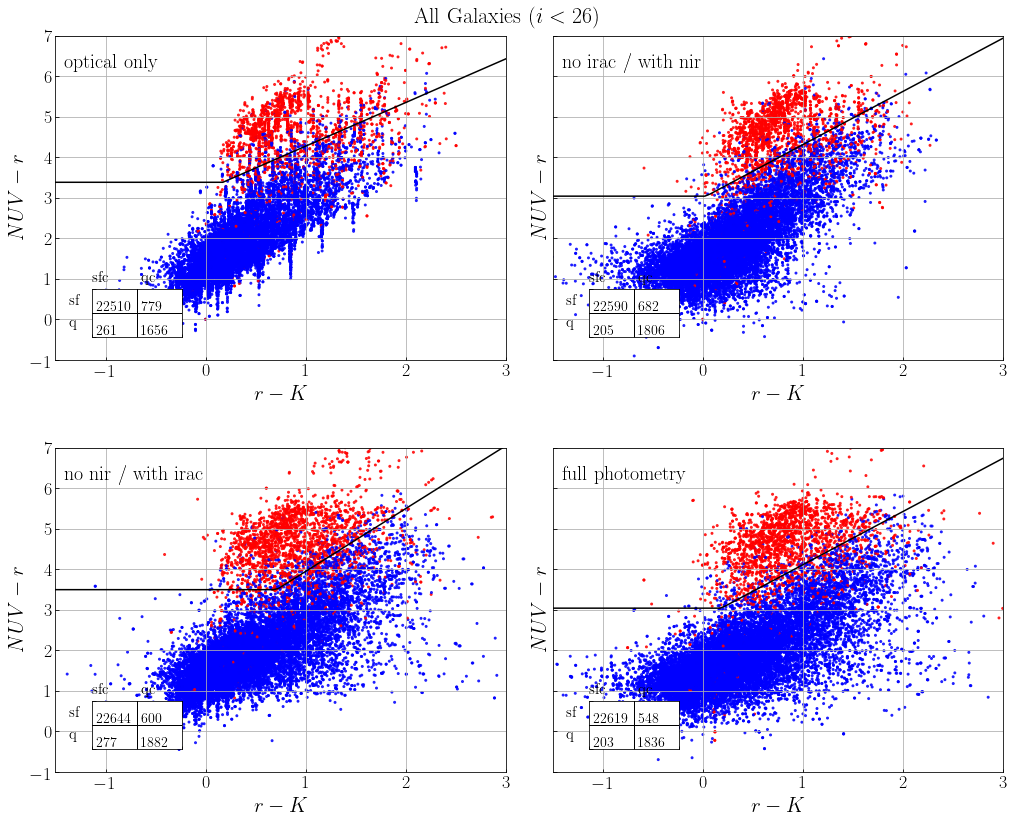

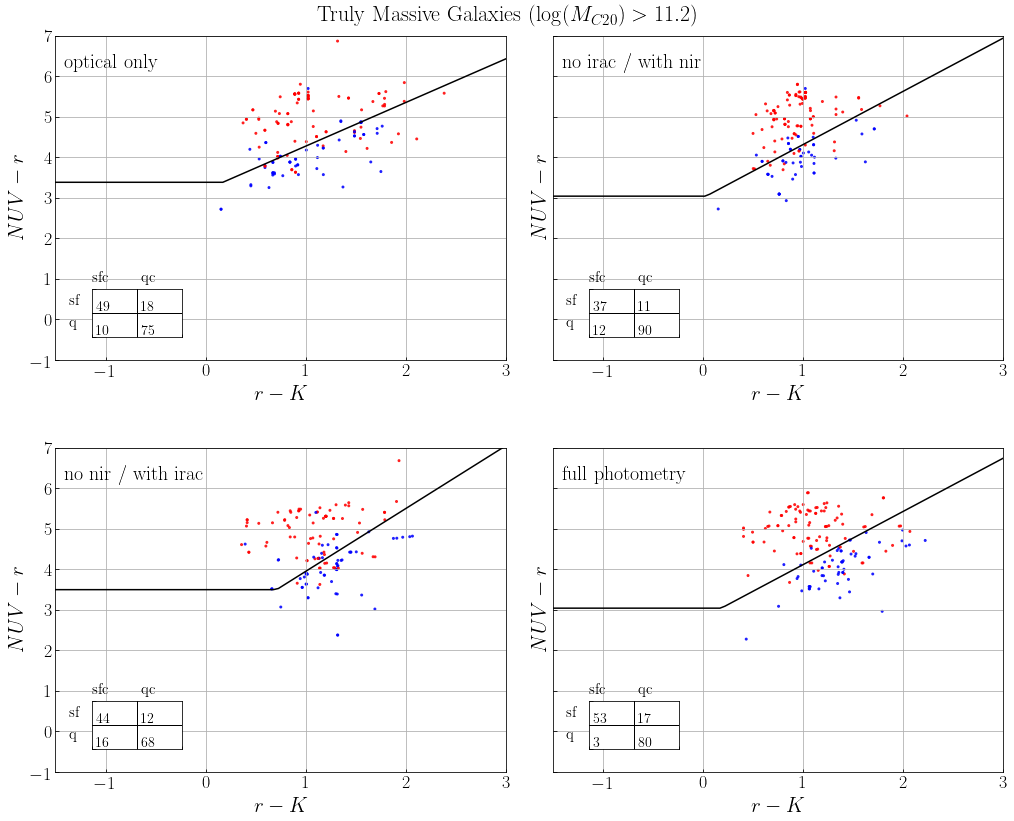

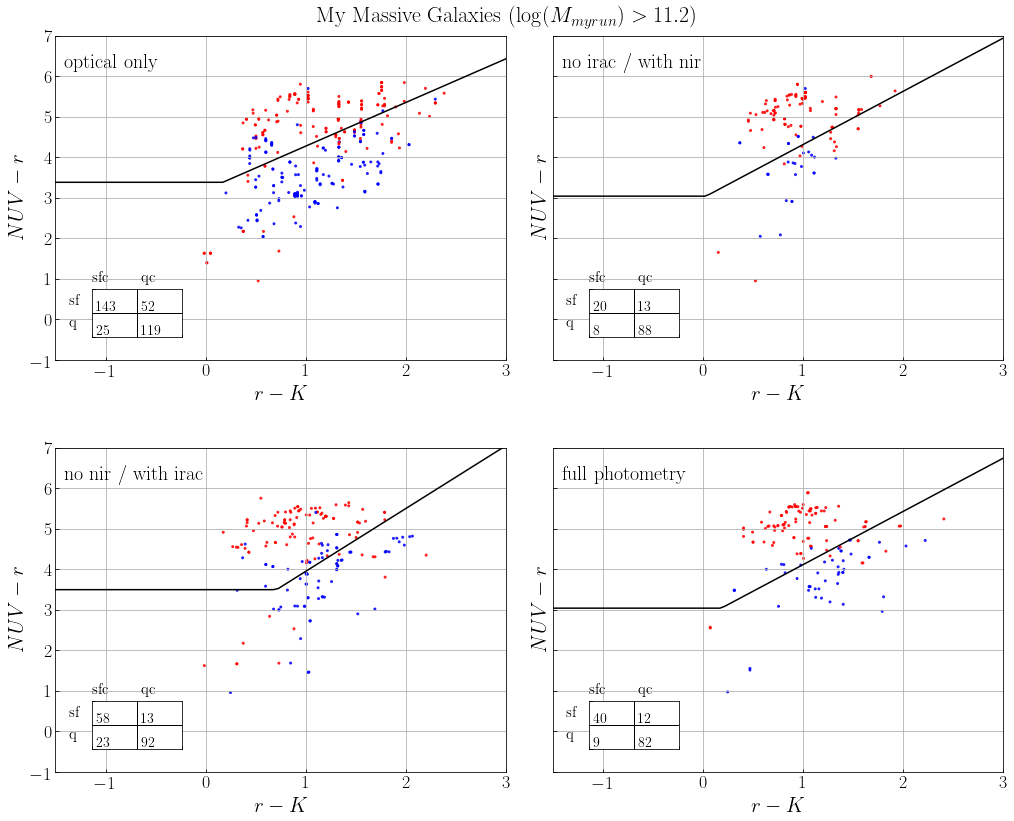

In [55]:
massive_cut=11.2
diagram_type = 'NUVrK'
pdf = matplotlib.backends.backend_pdf.PdfPages('/Users/lejay/Desktop/lephare_'+diagram_type+'.pdf')
for selection in ['all','massive','massive_c20']:
    fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
    for i,cat_name in enumerate(cat_names):
        row = i // 2; col = i % 2
        cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
        cat_output_c20added = cat_output_c20added[(cat_output_c20added['lp_zPDF']>0) & (cat_output_c20added['lp_zPDF']<1.5)]

        # select subsample
        flag_photoz = (cat_output_c20added['flag_photoz']==1)
        if selection == 'all':
            cond = np.ones(len(cat_output_c20added)).astype(bool)
            fig_title = 'All Galaxies ($i<26$)'
        elif selection == 'massive':
            cond = (cat_output_c20added['lp_mass_med']>massive_cut)
            fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>'+str(massive_cut)+'$)'
        elif selection == 'massive_c20':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut)
            fig_title = 'My Massive Galaxies ($\log(M_{myrun})>'+str(massive_cut)+'$)'
        elif selection == 'fake_massive':
            cond = (cat_output_c20added['MASS_MED_massrun']>massive_cut) & (cat_matched['lp_mass_med']<massive_cut-0.5)
            fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>'+str(massive_cut)+' ~ \& ~ \log(M_{C20}/M_\odot)<'+str(massive_cut-0.5)+'$)'
        else:
            raise NameError('wrong name')
        
        # COSMOS consistent photoz objects only
        
        cond = cond & flag_photoz
        if i==0: print('Number of objects:',len(cond[cond]))
        
        # NUVrK selection box
        best_box = np.load('best_select_box_onemassbin_lepharecheck_'+diagram_type+'_.npy')
        rk_draw = np.linspace(-2,3,100)
        nuv_draw_mid = gv_boundary_2(rk_draw,best_box[i][0],best_box[i][1],best_box[i][2])
        axs[row][col].plot(rk_draw, nuv_draw_mid, color='k')
        
        # plot
        if diagram_type == 'NUVrK':
            im = axs[row][col].scatter(cat_output_c20added[cond]['MAG_ABS_r']-cat_output_c20added[cond]['MAG_ABS_Ks'], 
                                   cat_output_c20added[cond]['MAG_ABS_NUV']-cat_output_c20added[cond]['MAG_ABS_r'],
                                   s=4,c=cat_output_c20added[cond]['CLASS'],alpha=0.8,cmap='bwr_r')
            axs[row][col].set_xlabel(r'$r-K$',fontsize=21)
        elif diagram_type == 'NUVrJ':
            im = axs[row][col].scatter(cat_output_c20added[cond]['MAG_ABS_r']-cat_output_c20added[cond]['MAG_ABS_J'], 
                                   cat_output_c20added[cond]['MAG_ABS_NUV']-cat_output_c20added[cond]['MAG_ABS_r'],
                                   s=4,c=cat_output_c20added[cond]['CLASS'],alpha=0.8,cmap='bwr_r')
            axs[row][col].set_xlabel(r'$r-J$',fontsize=21)
        axs[row][col].set_ylabel(r'$NUV-r$',fontsize=21)
        axs[row][col].set_xlim([-1.5,3])
        axs[row][col].set_ylim([-1,7])
        axs[row][col].grid()
        axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        
        #### contingency table / confusion matrix (inset plot 2) ######
        # q=P sf=N
        cat = cat_output_c20added[cond]
        cat_sf = cat[cat['CLASS']==1]
        cat_q = cat[cat['CLASS']==0]
        if diagram_type == 'NUVrK':
            rk_sf = np.array(cat_sf['MAG_ABS_r'] - cat_sf['MAG_ABS_Ks'])
            rk_q = np.array(cat_q['MAG_ABS_r'] - cat_q['MAG_ABS_Ks']) 
            delta_gv_sf = cat_sf['MAG_ABS_NUV'] - cat_sf['MAG_ABS_r']-gv_boundary_2(rk_sf,best_box[i][0],best_box[i][1],best_box[i][2])
            delta_gv_q = cat_q['MAG_ABS_NUV'] - cat_q['MAG_ABS_r']-gv_boundary_2(rk_q,best_box[i][0],best_box[i][1],best_box[i][2])
        elif diagram_type == 'NUVrJ':
            rj_sf = np.array(cat_sf['MAG_ABS_r'] - cat_sf['MAG_ABS_J'])
            rj_q = np.array(cat_q['MAG_ABS_r'] - cat_q['MAG_ABS_J']) 
            delta_gv_sf = cat_sf['MAG_ABS_NUV'] - cat_sf['MAG_ABS_r']-gv_boundary_2(rj_sf,best_box[i][0],best_box[i][1],best_box[i][2])
            delta_gv_q = cat_q['MAG_ABS_NUV'] - cat_q['MAG_ABS_r']-gv_boundary_2(rj_q,best_box[i][0],best_box[i][1],best_box[i][2])
    
        sf_sf = len(cat_sf[delta_gv_sf<0])  # TN
        q_q = len(cat_q[delta_gv_q>0])      # TP
        sf_q = len(cat_q[delta_gv_q<0])     # FP
        q_sf = len(cat_sf[delta_gv_sf>0])   # FN
        
        # inset table
        axs[row][col].annotate('sfc',xy=([0.08,0.24]),xycoords='axes fraction',fontsize=15)
        axs[row][col].annotate('qc',xy=([0.19,0.24]),xycoords='axes fraction',fontsize=15)
        axs[row][col].annotate('sf',xy=([0.03,0.17]),xycoords='axes fraction',fontsize=15)
        axs[row][col].annotate('q',xy=([0.03,0.1]),xycoords='axes fraction',fontsize=15)
        ax_insert2 = axs[row][col].inset_axes([0.08, 0.07, 0.2, 0.15])
        ax_insert2.annotate(str(sf_sf),xy=([-0.9,0.1]),fontsize=14)
        ax_insert2.annotate(str(sf_q),xy=([0.1,0.1]),fontsize=14)
        ax_insert2.annotate(str(q_sf),xy=([-0.9,-0.9]),fontsize=14)
        ax_insert2.annotate(str(q_q),xy=([0.1,-0.9]),fontsize=14)
        ax_insert2.axvline(ymin=-1,ymax=1,x=0,color='k',linewidth=1)
        ax_insert2.axhline(xmin=-1,xmax=1,y=0,color='k',linewidth=1)
        ax_insert2.set_xlim([-1,1])
        ax_insert2.set_ylim([-1,1])
        ax_insert2.set_yticklabels([])
        ax_insert2.set_xticklabels([])
    
    plt.suptitle(fig_title,fontsize=22)
    plt.tight_layout(pad=4, w_pad=2)
    pdf.savefig( fig )
pdf.close()

#### split redshift bins

0 15 3 3
4 14 0 1
13 18 4 1
10 25 6 6
32 39 16 2
74 12 3 19


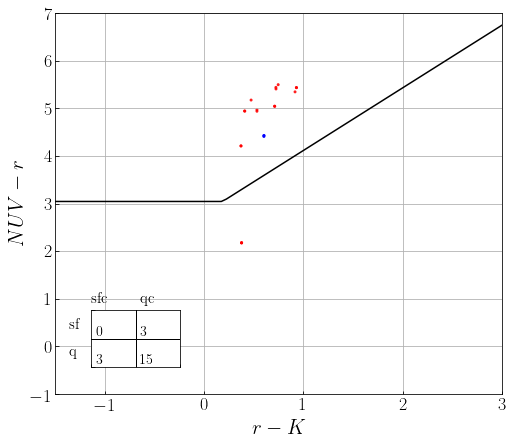

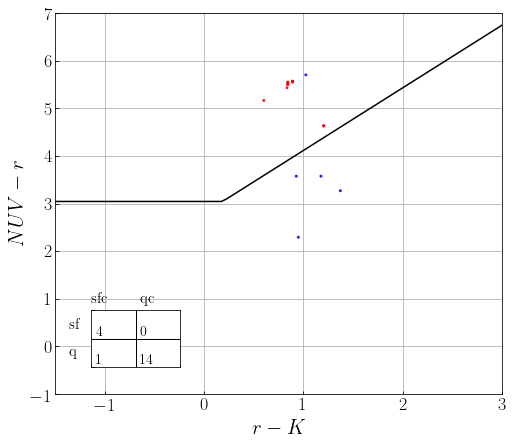

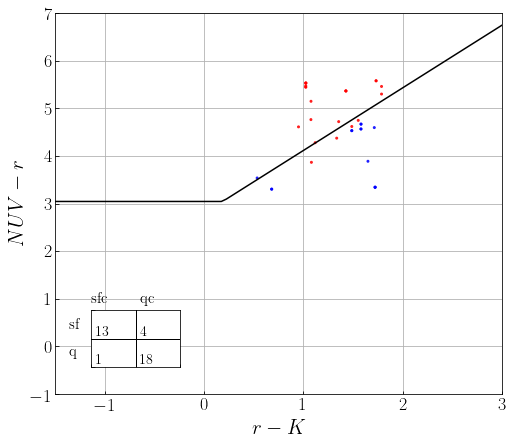

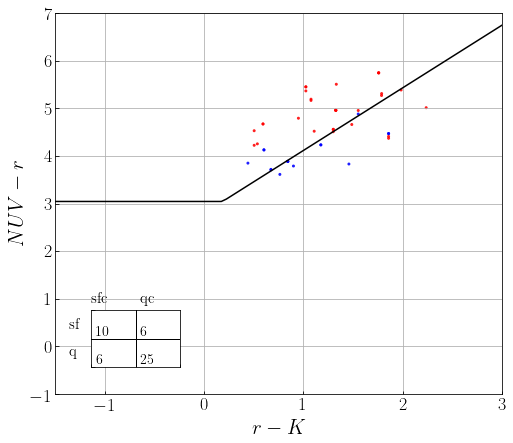

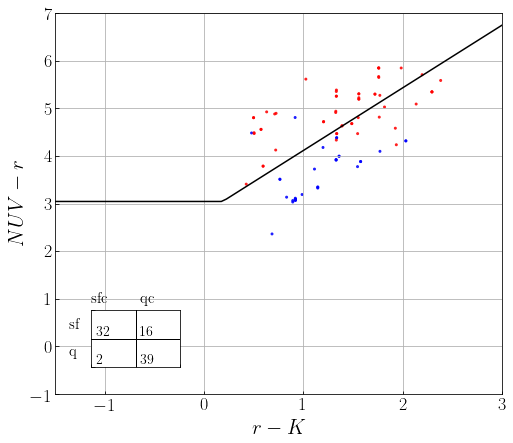

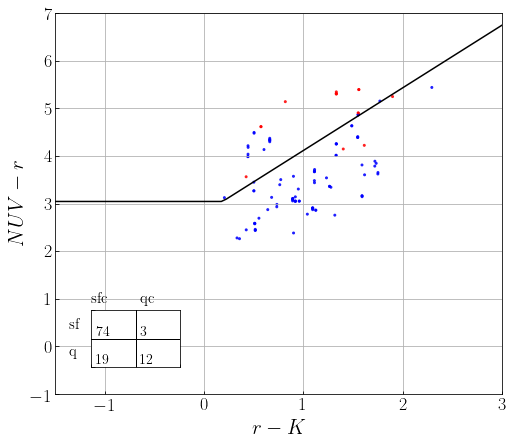

In [56]:
massive_cut=11.2
diagram_type = 'NUVrK'
selection = 'massive'
cat_name = cat_names[0]
fc_list = [] # purity (contatnimate fraction)
fm_list = [] # completeness (missed fraction)
cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
z_list = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
for z in z_list:
    fig, axs = plt.subplots(1, 1, figsize = (8, 7), sharey=True)
    cat_output_c20added_z = cat_output_c20added[(cat_output_c20added['lp_zPDF']>z-0.1) & (cat_output_c20added['lp_zPDF']<z+0.1)]
    
    # COSMOS consistent photoz objects only
    cond = (cat_output_c20added_z['MASS_MED_massrun']>massive_cut)
    flag_photoz = (cat_output_c20added_z['flag_photoz']==1)
    cond = cond & flag_photoz
        
    # NUVrK selection box
    best_box = np.load('best_select_box_onemassbin_lepharecheck_'+diagram_type+'_.npy')
    rk_draw = np.linspace(-2,3,100)
    nuv_draw_mid = gv_boundary_2(rk_draw,best_box[i][0],best_box[i][1],best_box[i][2])
    plt.plot(rk_draw, nuv_draw_mid, color='k')
    if diagram_type == 'NUVrK':
        im = plt.scatter(cat_output_c20added_z[cond]['MAG_ABS_r']-cat_output_c20added_z[cond]['MAG_ABS_Ks'], 
                                   cat_output_c20added_z[cond]['MAG_ABS_NUV']-cat_output_c20added_z[cond]['MAG_ABS_r'],
                                   s=4,c=cat_output_c20added_z[cond]['CLASS'],alpha=0.8,cmap='bwr_r')
        plt.xlabel(r'$r-K$',fontsize=21)
    elif diagram_type == 'NUVrJ':
        im = plt.scatter(cat_output_c20added_z[cond]['MAG_ABS_r']-cat_output_c20added_z[cond]['MAG_ABS_J'], 
                                   cat_output_c20added_z[cond]['MAG_ABS_NUV']-cat_output_c20added_z[cond]['MAG_ABS_r'],
                                   s=4,c=cat_output_c20added_z[cond]['CLASS'],alpha=0.8,cmap='bwr_r')
        plt.xlabel(r'$r-J$',fontsize=21)
    
    plt.ylabel(r'$NUV-r$',fontsize=21)
    plt.xlim([-1.5,3])
    plt.ylim([-1,7])
    plt.grid()
    # plt.annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='k')
        
    #### contingency table / confusion matrix (inset plot 2) ######
    # q=P sf=N
    cat = cat_output_c20added_z[cond]
    cat_sf = cat[cat['CLASS']==1]
    cat_q = cat[cat['CLASS']==0]
    if diagram_type == 'NUVrK':
        rk_sf = np.array(cat_sf['MAG_ABS_r'] - cat_sf['MAG_ABS_Ks'])
        rk_q = np.array(cat_q['MAG_ABS_r'] - cat_q['MAG_ABS_Ks']) 
        delta_gv_sf = cat_sf['MAG_ABS_NUV'] - cat_sf['MAG_ABS_r']-gv_boundary_2(rk_sf,best_box[i][0],best_box[i][1],best_box[i][2])
        delta_gv_q = cat_q['MAG_ABS_NUV'] - cat_q['MAG_ABS_r']-gv_boundary_2(rk_q,best_box[i][0],best_box[i][1],best_box[i][2])
    elif diagram_type == 'NUVrJ':
        rj_sf = np.array(cat_sf['MAG_ABS_r'] - cat_sf['MAG_ABS_J'])
        rj_q = np.array(cat_q['MAG_ABS_r'] - cat_q['MAG_ABS_J']) 
        delta_gv_sf = cat_sf['MAG_ABS_NUV'] - cat_sf['MAG_ABS_r']-gv_boundary_2(rj_sf,best_box[i][0],best_box[i][1],best_box[i][2])
        delta_gv_q = cat_q['MAG_ABS_NUV'] - cat_q['MAG_ABS_r']-gv_boundary_2(rj_q,best_box[i][0],best_box[i][1],best_box[i][2])
    
    sf_sf = len(cat_sf[delta_gv_sf<0])  # TN
    q_q = len(cat_q[delta_gv_q>0])      # TP
    sf_q = len(cat_q[delta_gv_q<0])     # FP
    q_sf = len(cat_sf[delta_gv_sf>0])   # FN
    print(sf_sf,q_q,sf_q,q_sf)
    fc = sf_q/(q_q+sf_q)
    fm = q_sf/(q_q+q_sf)
    fc_list.append(fc)
    fm_list.append(fm)
    
    # inset table
    plt.annotate('sfc',xy=([0.08,0.24]),xycoords='axes fraction',fontsize=15)
    plt.annotate('qc',xy=([0.19,0.24]),xycoords='axes fraction',fontsize=15)
    plt.annotate('sf',xy=([0.03,0.17]),xycoords='axes fraction',fontsize=15)
    plt.annotate('q',xy=([0.03,0.1]),xycoords='axes fraction',fontsize=15)
    ax_insert2 = axs.inset_axes([0.08, 0.07, 0.2, 0.15])
    ax_insert2.annotate(str(sf_sf),xy=([-0.9,0.1]),fontsize=14)
    ax_insert2.annotate(str(sf_q),xy=([0.1,0.1]),fontsize=14)
    ax_insert2.annotate(str(q_sf),xy=([-0.9,-0.9]),fontsize=14)
    ax_insert2.annotate(str(q_q),xy=([0.1,-0.9]),fontsize=14)
    ax_insert2.axvline(ymin=-1,ymax=1,x=0,color='k',linewidth=1)
    ax_insert2.axhline(xmin=-1,xmax=1,y=0,color='k',linewidth=1)
    ax_insert2.set_xlim([-1,1])
    ax_insert2.set_ylim([-1,1])
    ax_insert2.set_yticklabels([])
    ax_insert2.set_xticklabels([])

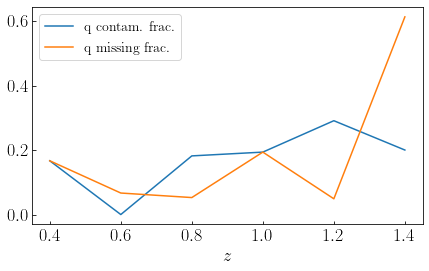

In [58]:
fig, axs = plt.subplots(1, 1, figsize = (7, 4), sharey=True)
plt.plot(z_list,fc_list,label='q contam. frac.')
plt.plot(z_list,fm_list,label='q missing frac.')
plt.xlabel('$z$',fontsize=18)
plt.legend(fontsize=14)